<style>
body {
    max-width: 900px;
    margin: 40px auto;
    padding: 0 20px;
    font-family: "Georgia", serif;
    line-height: 1.6;
}
</style>

<div style="text-align: center; padding: 60px 60px">
  <h1 style="font-weight: bold; font-size: 3.1em">
    PRECIPITACIÓN EN PUEBLA
  </h1>
</div>



Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/
https://www.ncei.noaa.gov/pub/data/ghcn/v4/products/StationPlots/MX/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/  
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/doc/


Ubicación de la estación: 19.0000, -98.1833


# **CONFIGURACIÓN DE LA NOTETBOOK**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
# The color palette is made up of the 20 colors. Hex color codes:  #395e77, #413344,  #614c65,  #806485,  #936397,  #a662a8,  #664972,  #463c57,  #6e8da9,  #91bcdd,  #567d99,  #305662,  #264d4d,  #315c45,  #8a9a65,  #b6b975,  #b65d54,  #b60033,  #98062d and  #800022.
# https://colorkit.co/palette/413344-614c65-806485-936397-a662a8-664972-463c57-6e8da9-91bcdd-567d99-395e77-305662-264d4d-315c45-8a9a65-b6b975-b65d54-b60033-98062d-800022/
sns.set_palette(["#194a7a", "#b60033", "#315c45", "#b65d54", "#B9445F", "#567d99", "#395e77", "#413344", "#614c65", "#806485", "#936397", "#a662a8", "#664972", "#463c57", "#6e8da9", "#91bcdd", "#305662", "#264d4d",  "#8a9a65", "#b6b975", "#98062d", "#800022"])
sns.color_palette()

[(0.09803921568627451, 0.2901960784313726, 0.47843137254901963),
 (0.7137254901960784, 0.0, 0.2),
 (0.19215686274509805, 0.3607843137254902, 0.27058823529411763),
 (0.7137254901960784, 0.36470588235294116, 0.32941176470588235),
 (0.7254901960784313, 0.26666666666666666, 0.37254901960784315),
 (0.33725490196078434, 0.49019607843137253, 0.6),
 (0.2235294117647059, 0.3686274509803922, 0.4666666666666667),
 (0.2549019607843137, 0.2, 0.26666666666666666),
 (0.3803921568627451, 0.2980392156862745, 0.396078431372549),
 (0.5019607843137255, 0.39215686274509803, 0.5215686274509804),
 (0.5764705882352941, 0.38823529411764707, 0.592156862745098),
 (0.6509803921568628, 0.3843137254901961, 0.6588235294117647),
 (0.4, 0.28627450980392155, 0.4470588235294118),
 (0.27450980392156865, 0.23529411764705882, 0.3411764705882353),
 (0.43137254901960786, 0.5529411764705883, 0.6627450980392157),
 (0.5686274509803921, 0.7372549019607844, 0.8666666666666667),
 (0.18823529411764706, 0.33725490196078434, 0.3843137254901961),
 (0.14901960784313725, 0.30196078431372547, 0.30196078431372547),
 (0.5411764705882353, 0.6039215686274509, 0.396078431372549),
 (0.7137254901960784, 0.7254901960784313, 0.4588235294117647),
 (0.596078431372549, 0.023529411764705882, 0.17647058823529413),
 (0.5019607843137255, 0.0, 0.13333333333333333)]

In [5]:
# Personalización global con matplotlib
plt.rcParams.update({
    'axes.titlesize': 14,        # Tamaño del título
    'axes.titleweight': 'bold',  # Negrita en el título
    'xtick.labelsize': 8,        # Tamaño de los xticks
    'ytick.labelsize': 8,         # Tamaño de los yticks
    'grid.color': 'gray',         # Color de las líneas del grid
    'grid.linestyle': '--',       # Estilo de línea (puede ser '-', '--', '-.', ':')
    'grid.linewidth': 0.5,        # Grosor del grid
    'axes.grid': True,            # Asegura que el grid esté activado
    'axes.grid.axis': 'both',     # Aplica el grid a ambos ejes
    'lines.linewidth': 1.2,       # Grosor de las líneas
    'figure.figsize': (12, 6),   # Tamaño de la figura
})

# **CARGAR DATOS**

In [6]:
data=pd.read_csv('MXN00021035.csv')

In [7]:
pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie
pre

195209
1952-10-01     174
1952-11-01     592
1952-12-01       0
1953-04-01      47
1953-05-01     137
              ... 
2009-08-01    1474
2009-09-01    3161
2009-10-01    1190
2009-11-01     155
2009-12-01      51
Length: 672, dtype: int64

In [8]:
import matplotlib.dates as mdates

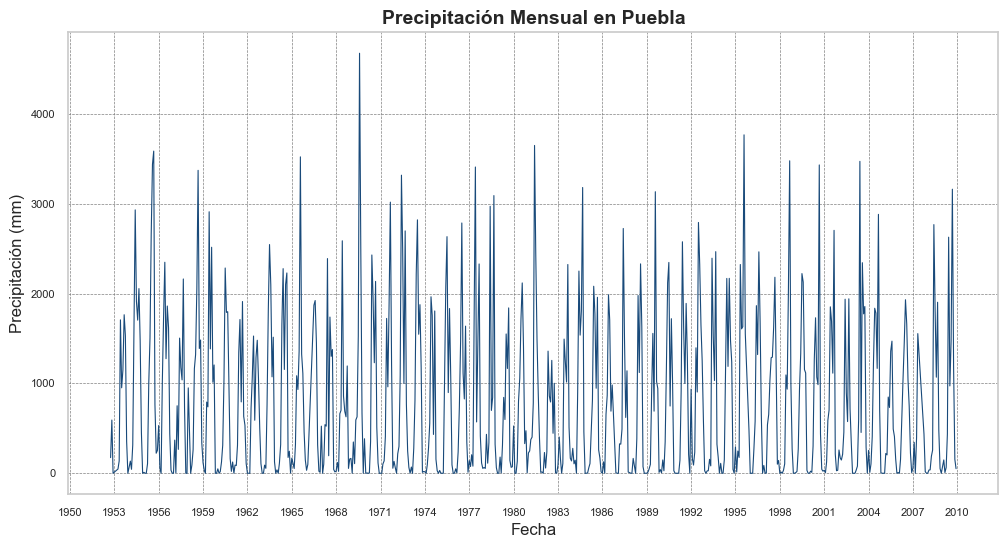

In [9]:
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12*3))  # Pone cada 5 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))     # Formato de fecha
plt.plot(pre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla")
plt.savefig('imagenes/01-01-precipitacion.svg', bbox_inches='tight')
plt.show()

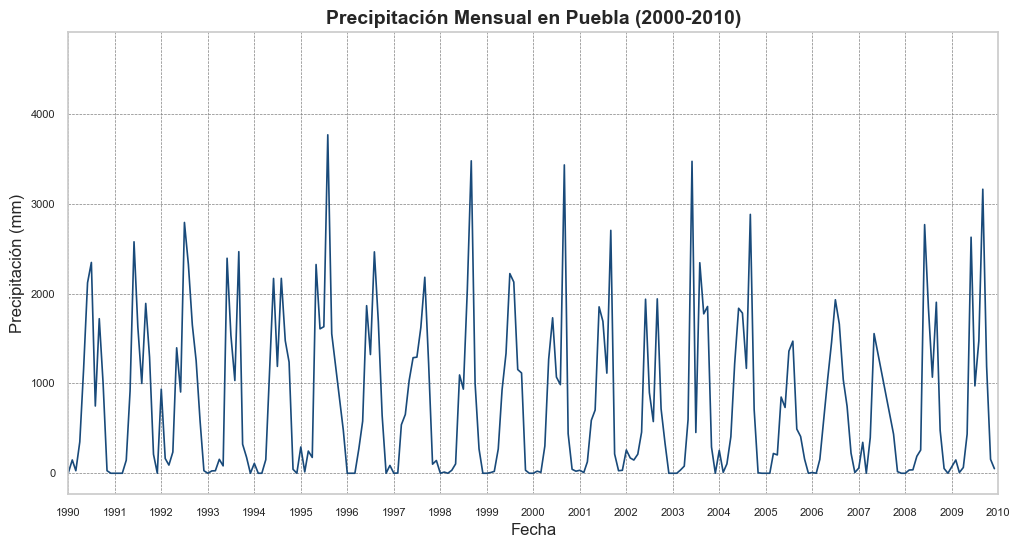

In [10]:
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Pone cada 5 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))     # Formato de fecha
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla (2000-2010)")
plt.xlim(pd.Timestamp('1990-01-01'), pd.Timestamp('2010-01-01')) 
plt.savefig('imagenes/01-02-precipitacion-zoom.svg', bbox_inches='tight')
plt.show()

# **TRAIN Y TEST**

In [11]:
# Partir la serie para train y test
pre_total = pre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
pre = pre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
pre_test = pre_total[-12:]      # Test: últimos 12 meses

# **ESTACIONARIEDAD**

In [12]:
from statsmodels.tsa.stattools import adfuller  

In [13]:
adfuller(pre)

(-6.150368236022425,
 7.588129761676573e-08,
 11,
 648,
 {'1%': -3.4404817800778034,
  '5%': -2.866010569916275,
  '10%': -2.569150763698369},
 9999.934707132943)

```text
Estadístico ADF         = -6.150  
Valor-p                 = 7.59e-08  
Número de rezagos       = 11  
Número de observaciones = 648  
Valores críticos:
    1%  -> -3.4405
    5%  -> -2.8660
    10% -> -2.5692
Log-likelihood          = 9999.935
```

- El estadístico ADF es $-6.150$, menor que los valores críticos a los niveles del 1%.  
- El valor-p es $7.59 × 10^{-8}$ mucho menor al nivel de significancia $\alpha$ = 0.05.

Por lo tanto, se rechaza la hipótesis nula, es decir, se concluye que la serie es estacionaria.

## **AUTOCORRELACIONES**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

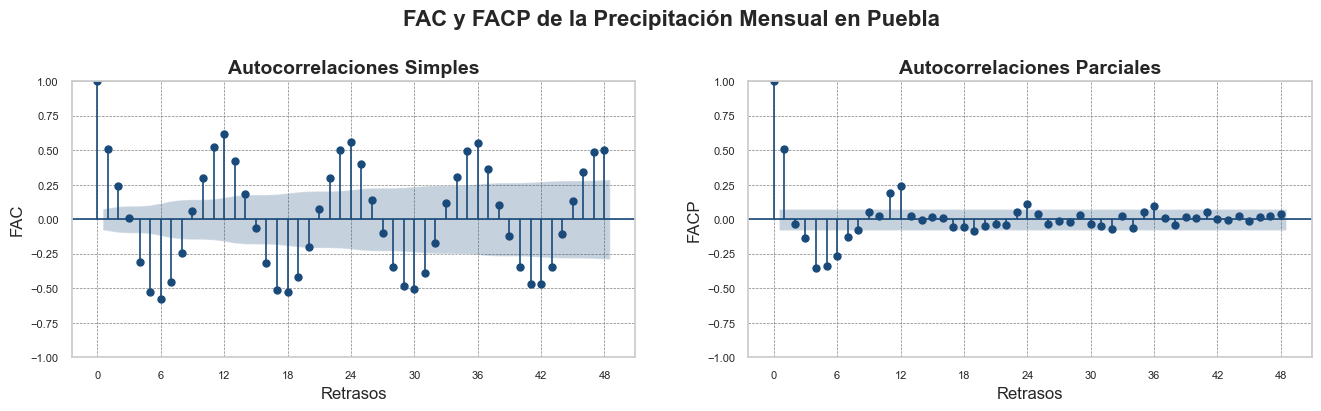

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(pre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(pre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

axs[0].set_xlabel('Retrasos')
axs[1].set_xlabel('Retrasos')
axs[0].set_ylabel('FAC')
axs[1].set_ylabel('FACP')

plt.subplots_adjust(top=0.8)
plt.suptitle('FAC y FACP de la Precipitación Mensual en Puebla', fontsize=16, weight='bold')

plt.savefig('imagenes/02-01-fac-facp-serie.svg', bbox_inches='tight')
plt.show()


In [16]:
fac = FAC(len(pre), acf(pre, nlags=48)[1:] )

Valores de autocorrelacion significativos:
r1: 0.5114347926277152
r2: 0.2378815083370086
r4: -0.31136216826642676
r5: -0.5289967604156933
r6: -0.5765988530134251
r7: -0.45402986204483337
r8: -0.24420551667402535
r10: 0.2960004737880804
r11: 0.5240658344251691
r12: 0.6173499572874945
r13: 0.42440124462107487
r14: 0.18265000690415575
r16: -0.31903920298321276
r17: -0.514286815393446
r18: -0.5278295916966887
r19: -0.4187324328138189
r22: 0.3006730414425205
r23: 0.5028304240974978
r24: 0.5626631891391943
r25: 0.39948343590954255
r28: -0.34516091598549786
r29: -0.48547226384609826
r30: -0.5033566062877032
r31: -0.3876168494029379
r34: 0.30856455272265265
r35: 0.4965812730150528
r36: 0.553098035132298
r37: 0.362419662951846
r40: -0.34546977043477234
r41: -0.46746184222185844
r42: -0.4676133939696062
r43: -0.3424341862008628
r46: 0.3414843279972229
r47: 0.4886001688622175
r48: 0.5000880408130987


In [17]:
facp = FACP(len(pre), pacf(pre, nlags=48)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.5122108697030229
rho 3: -0.13710249814403871
rho 4: -0.35568794886746197
rho 5: -0.33906687235830346
rho 6: -0.26990992305506767
rho 7: -0.13651941979413407
rho 8: -0.08206891960261499
rho 11: 0.19446853660047778
rho 12: 0.25021094781029624
rho 19: -0.0924235210146646
rho 24: 0.12444505947195691
rho 32: -0.08477112361318027
rho 36: 0.11301403546356234


**Aunque la serie es estacionaria, dado que las autocorrelaciones simples decrecen muy muy lento, hacemos una primera diferencia estacional.**

# **TRANSFORMACIÓN**

Como la vamos a comparar con la transformacion de Yeo-Johnson, estandarizamos para comparar los modelos.

In [18]:
from scipy.stats import zscore

# Estandarizar la serie original
zpre = zscore(pre)

# **DIFERENCIA ESTACIONAL**

La **diferencia estacional de orden $D$**, con una periodicidad estacional $s$, se define de forma recursiva aplicando el operador $\nabla_s$ múltiples veces:
*
$$
\nabla_s^D X_t = (1 - B^s)^D X_t
$$*

donde:
- $D$ es el orden de la diferencia estacional,
- $B$ es el operador de rezago tal que $B^k X_t = y_{X-k}$,
- $\nabla_s^D$ representa aplicar $D$ veces la diferencia estacional.

Para esta serie, el orden de la diferencia estacional es $D = 1$ y la periodicidad estacional es $s = 12$:

$$
\nabla_{12}^1 \text{T} (X_t) = \text{T} (X_t) - \text{T} (X_{t-12})
$$

Sea entonces $Wt = \nabla_{12}^1 \text{T} (X_t) = \text{T} (X_t) - \text{T} (X_{t-12})$

In [19]:
# Primera diferencia estacional con periodicidad 12
dzpre = zpre.diff(12).dropna() 

In [20]:
# Visualizamos la serie
dzpre

195209
1954-02-01   -0.044296
1954-03-01   -0.622413
1954-04-01    0.357774
1954-05-01    1.807042
1954-06-01    3.173397
                ...   
2008-08-01    0.763251
2008-09-01    0.396391
2008-10-01    0.048839
2008-11-01    0.039753
2008-12-01    0.000000
Length: 648, dtype: float64

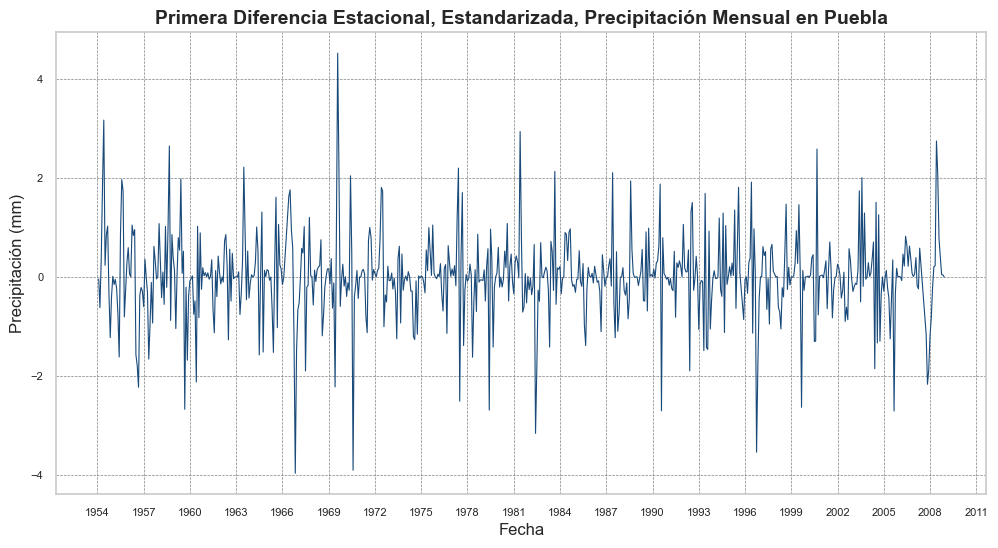

In [21]:
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12*3))  # Pone cada 5 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))     # Formato de fecha
plt.plot(dzpre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Primera Diferencia Estacional, Estandarizada, Precipitación Mensual en Puebla")
plt.savefig('imagenes/03-01-primera-diferencia-estacional-precipitacion.svg', bbox_inches='tight')
plt.show()

In [22]:
adfuller(dzpre)

(-10.87140868877965,
 1.3655020494523785e-19,
 11,
 636,
 {'1%': -3.4406737255613256,
  '5%': -2.866095119842903,
  '10%': -2.5691958123689727},
 1449.530754185683)

```text
Estadístico ADF         = -10.871  
Valor-p                 = 1.37e-19  
Número de rezagos       = 11  
Número de observaciones = 636  
Valores críticos:
    1%  -> -3.4407
    5%  -> -2.8661
    10% -> -2.5692
Log-likelihood          = 9952.186
```

- El estadístico ADF es $-10.871$, menor que los valores críticos a los niveles del 1%.  
- El valor-p es $1.37 × 10^{-19}$ mucho menor al nivel de significancia $\alpha$ = 0.05.

Por lo tanto, se rechaza la hipótesis nula, es decir, se concluye que la serie es estacionaria.

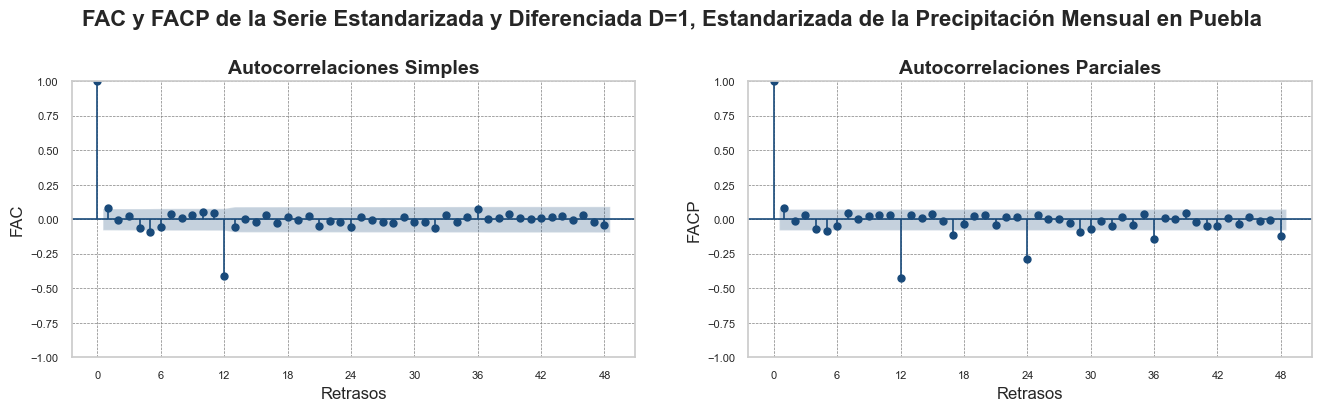

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(dzpre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(dzpre, lags=12*4, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

axs[0].set_xlabel('Retrasos')
axs[1].set_xlabel('Retrasos')
axs[0].set_ylabel('FAC')
axs[1].set_ylabel('FACP')

plt.subplots_adjust(top=0.8)
plt.suptitle('FAC y FACP de la Serie Estandarizada y Diferenciada D=1, Estandarizada de la Precipitación Mensual en Puebla', fontsize=16, weight='bold')

plt.savefig('imagenes/03-02-fac-facp-serie-D1.svg', bbox_inches='tight')
plt.show()


Se sigue notando la estacionalidad de periodicidad 12.

In [24]:
fac = FAC(len(dzpre), acf(dzpre, nlags=12*10)[1:] )

Valores de autocorrelacion significativos:
r1: 0.08495427799538309
r5: -0.09455404757011152
r12: -0.41418332950296094
r69: 0.13811523521698316
r73: -0.11256100076387932
r82: -0.09936326169869977


In [25]:
facp = FACP(len(dzpre), pacf(dzpre, nlags=12*10)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.08508558290727704
rho 5: -0.08389897753926691
rho 12: -0.43583220424270375
rho 17: -0.12023508334631484
rho 24: -0.30097443805877616
rho 29: -0.10198920198664936
rho 36: -0.15950168604080825
rho 48: -0.14036369491687153
rho 57: -0.09168717760514207
rho 60: -0.1239606605892366
rho 61: 0.13800141862943802
rho 69: 0.10269095820413282
rho 72: -0.09462958643919699
rho 82: -0.08002594037040578
rho 85: -0.08198325512480845
rho 93: 0.092203788733838
rho 109: 0.09582379018763891
rho 113: -0.09105599732819755
rho 119: 0.09171771966671013
rho 120: -0.13558724808031059


### **Se compara con más diferencias estacionales**

In [26]:
# 2 diferencia estacional con periodicidad 12
d2zpre = dzpre.diff(12).dropna() 

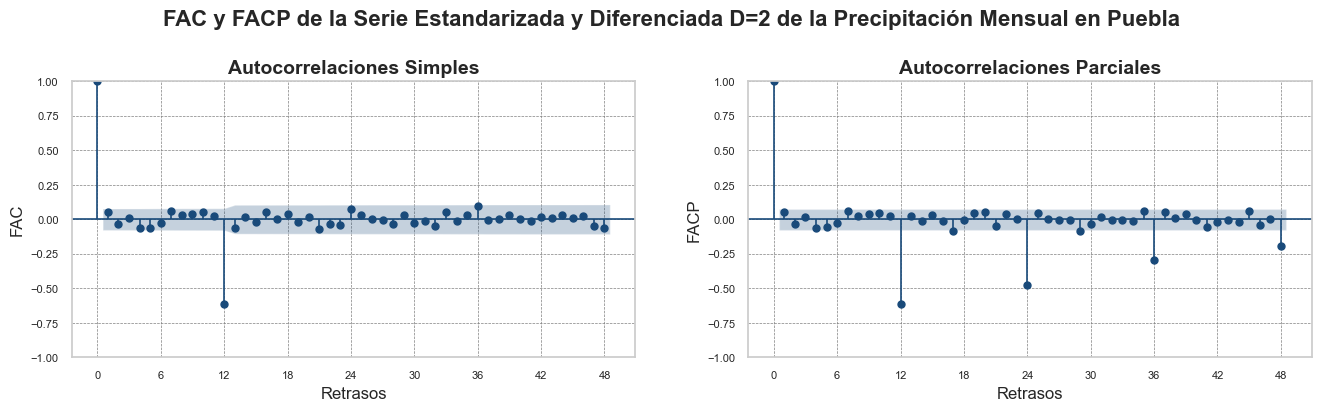

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(d2zpre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(d2zpre, lags=12*4, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

axs[0].set_xlabel('Retrasos')
axs[1].set_xlabel('Retrasos')
axs[0].set_ylabel('FAC')
axs[1].set_ylabel('FACP')


plt.subplots_adjust(top=0.8)
plt.suptitle('FAC y FACP de la Serie Estandarizada y Diferenciada D=2 de la Precipitación Mensual en Puebla', fontsize=16, weight='bold')

plt.savefig('imagenes/03-03-fac-facp-serie-D2.svg', bbox_inches='tight')
plt.show()


In [28]:
fac = FAC(len(d2zpre), acf(d2zpre, nlags=12*10)[1:] )

Valores de autocorrelacion significativos:
r12: -0.615018212908429
r57: -0.10922275236044277
r69: 0.16716305731426437
r73: -0.1136588116750907
r81: -0.12386243150076602
r82: -0.11601226324982332


In [29]:
facp = FACP(len(d2zpre), pacf(d2zpre, nlags=12*10)[1:])

Valores de autocorrelacion parcial significativos:
rho 12: -0.6294838987246429
rho 17: -0.09052048792417974
rho 24: -0.510301154673974
rho 29: -0.09321702577351394
rho 36: -0.35512386267960755
rho 48: -0.2751156800940455
rho 57: -0.10891616879871288
rho 60: -0.23792892212149455
rho 61: 0.20095345338550874
rho 65: -0.08341294753890602
rho 72: -0.29986531752257806
rho 73: 0.30249671907577647
rho 74: -0.1521469232383268
rho 75: 0.12158013142041249
rho 77: -0.21501383907291427
rho 79: -0.08587576253968643
rho 80: 0.10575443412592932
rho 81: -0.11295475178675143
rho 83: 0.1412351900166407
rho 84: -0.4738903735818693
rho 85: 0.8052856123151381
rho 86: -2.7039482046551293
rho 87: -1.373648398765204
rho 88: 1.0019992843716292
rho 89: 235.89044016524818
rho 90: -0.9971937437125115
rho 91: 0.4802148607866808
rho 93: -0.20196306057246763
rho 94: 0.2853293740090054
rho 95: -0.23402172704695937
rho 101: 0.25176068174227473
rho 102: -0.5167154340590162
rho 103: 0.769041880528836
rho 104: -1.34015609

In [30]:
# Primera diferencia estacional con periodicidad 12
d3zpre = d2zpre.diff(12).dropna() 

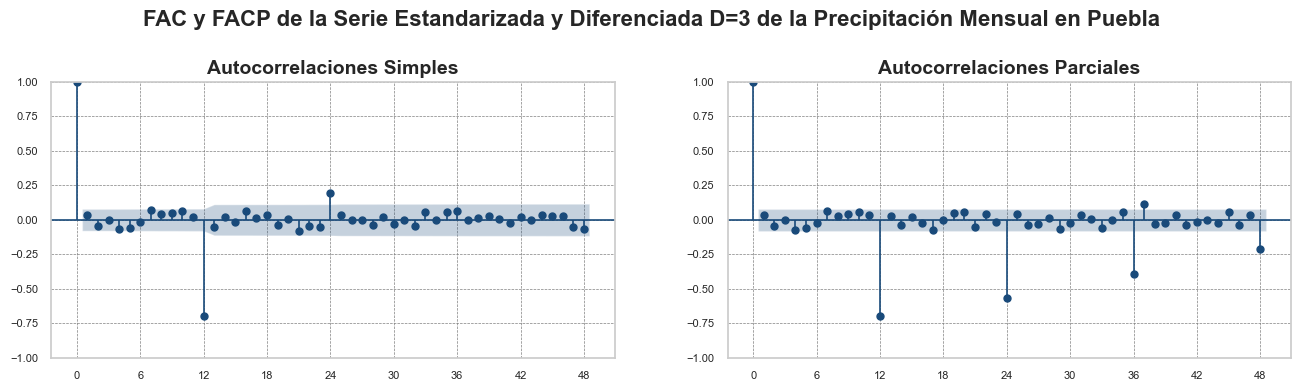

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(d3zpre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(d3zpre, lags=12*4, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.subplots_adjust(top=0.8)
plt.suptitle('FAC y FACP de la Serie Estandarizada y Diferenciada D=3 de la Precipitación Mensual en Puebla', fontsize=16, weight='bold')

plt.savefig('imagenes/03-04-fac-facp-serie-D3.svg', bbox_inches='tight')
plt.show()

In [32]:
fac = FAC(len(d3zpre), acf(d3zpre, nlags=12*10)[1:] )

Valores de autocorrelacion significativos:
r12: -0.6989860750076662
r24: 0.1914830429092127
r57: -0.13077245780878802
r69: 0.1818078385940247
r81: -0.14463883763129656


In [33]:
facp = FACP(len(d3zpre), pacf(d3zpre, nlags=12*10)[1:])

Valores de autocorrelacion parcial significativos:
rho 12: -0.7131085439918822
rho 24: -0.6165329897683698
rho 29: -0.08067623128823122
rho 36: -0.5171728973407931
rho 37: 0.19820551087554072
rho 40: 0.10015883076893467
rho 41: -0.09228473683010359
rho 47: 0.09394099253472983
rho 48: -0.4929991451837094
rho 49: 0.27281984306019
rho 50: -0.09255185942813789
rho 51: -0.10940745619258677
rho 52: 0.3451466064112664
rho 53: -0.3969949656195165
rho 54: 0.33091157283953293
rho 55: -0.24725105044261528
rho 57: -0.16783972097581046
rho 58: -0.410667287201458
rho 59: 1.4752062518988478
rho 60: 3.447013197289512
rho 61: -0.9659453840292946
rho 62: 6.76297943109451
rho 63: 1.0827131685788467
rho 64: -0.820116384896757
rho 65: 1.5200084948855226
rho 66: 1.386316279034692
rho 67: -2.332119329594092
rho 68: -1.2962242829346433
rho 69: 0.5251991629965186
rho 70: 0.12535213223465322
rho 71: -0.43609447528834033
rho 72: 0.3580623446428222
rho 73: -0.1138999259876274
rho 74: -0.10235078255766872
rho 75: 

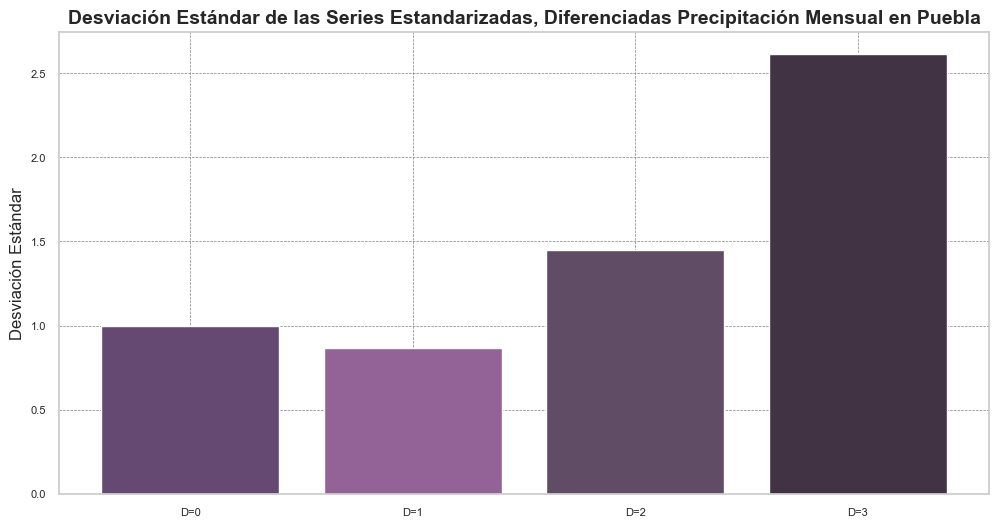

In [34]:
# Desviación estándar de la serie
stds = [np.std(zpre), np.std(dzpre), np.std(d2zpre), np.std(d3zpre)]

# Plotear la desviación estándar
plt.figure()
plt.bar(['D=0', 'D=1', 'D=2', 'D=3'], stds, color=[sns.color_palette()[12], sns.color_palette()[10], sns.color_palette()[8], sns.color_palette()[7]])
plt.ylabel('Desviación Estándar')
plt.title('Desviación Estándar de las Series Estandarizadas, Diferenciadas Precipitación Mensual en Puebla')
plt.savefig('imagenes/03-05-std-Ds.svg', bbox_inches='tight')
plt.show()

Nos quedamos con la primera diferencia estacional, porque tiene una mejor forma su FAC y FACP, además  de tener menor varianza.

# **MODELADO**

En `02-----Encontrar-los-Mejores-Modelos` se utilizá la libreria de `pmdarima` para intentar diferentes combinaciones de modelos y encontrar sus $\text{AIC}$. 

Se obtuvieron los siguientes resultados:

<pre>
(1)  ARIMA(1,0,0)(0,1,1)[12], AIC=1430.397
(2)  ARIMA(0,0,1)(0,1,1)[12], AIC=1431.266
(3)  ARIMA(1,0,1)(0,1,1)[12], AIC=1432.133
(4)  ARIMA(2,0,0)(0,1,1)[12], AIC=1432.157
(5)  ARIMA(1,0,0)(0,1,2)[12], AIC=1432.368
(6)  ARIMA(1,0,0)(1,1,1)[12], AIC=1432.373
(7)  ARIMA(0,0,2)(0,1,1)[12], AIC=1432.664
(8)  ARIMA(0,0,1)(0,1,2)[12], AIC=1433.240
(9)  ARIMA(0,0,1)(1,1,1)[12], AIC=1433.245
(10) ARIMA(2,0,1)(0,1,1)[12], AIC=1434.127
(11) ARIMA(0,0,0)(0,1,1)[12], AIC=1445.334
(12) ARIMA(1,0,0)(1,1,0)[12], AIC=1523.141
(13) ARIMA(0,0,1)(1,1,0)[12], AIC=1523.219
(14) ARIMA(0,0,1)(0,1,0)[12], AIC=1652.849
(15) ARIMA(1,0,0)(0,1,0)[12], AIC=1652.984
(16) ARIMA(0,0,0)(0,1,0)[12], AIC=1655.671
</pre>

Ningun modelo cumplió los supuestos. `02-01-Encontrar-Modelos-que-Cumplan`

Por la FAC y FACP, se creyó que podía ser un $\text{ARIMA}(1, 0, 1) \times (0, 1, 1, 12)$, pero este modelo, con la prueba de Ljung-Box, tenía dependencia entre los residuos. Ver `03-----Encontrar-Modelos-que-Cumplan`, **1 MODELO**.

Se propuso aumentar el número de parámetros, se pusieron parámetros "intuitivos", es decir, la precipitación depende de los últimos 5 meses, de los últimos 4 años, y hay residuos en los últimos dos meses, llegando al primer modelo que cumplía la independecia en los RESIDUOS siendo el $\text{ARIMA}(5, 0, 2) \times (4, 1, 0, 12)$. Sin embargo, no era estacionario ni invertible. Ver `03-----Encontrar-Modelos-que-Cumplan`, **2 MODELO**.

Se fue variando el número de parámetros de los modelos, notando curiosamente, que para esta serie, que los modelos que eran estacionarios eran los que tenían su parte del polinomio *autorregresivo* completa y no tenían parte *autorregresiva estacional* (y viceversa), lo mismo para la parte *media móvil* y la invertibilidad. Tomando en cuenta esta observación, se hicieron las notebooks de `03-01`, ..., `03-04`, donde se varían, por ejemplo, los $p$, manteniendo $P=0$, lo mismo para la parte *media móvil*. Lo malo, es que para los modelos tuvieran independencia en los residuos, los polinomios tenían que ser bastante grandes, lo que podía hacer que no se cumpliera el principio de parsimonia.

En las notebooks `03-01`, ..., `03-04` se proponen multiples modelos, que, dada la *Observación (2)*, que dice que para esta serie los modelos que cumplen esa forma son admisibles, se siguió el siguiente procedimiento:

- Se fijan los valores de $\text{ARIMA}(p, 0, q) \times (0, 1, 0, 12)$ donde $p = 0, 1, 2, \dots$ y $q = 0, 1, 2, \dots$.
- Se fijan los valores de $\text{ARIMA}(0, 0, q) \times (P, 1, 0, 12)$ donde $P = 0, 1, 2, \dots$ y $q = 0, 1, 2, \dots$.
- Se fijan los valores de $\text{ARIMA}(p, 0, 0) \times (0, 1, Q, 12)$ donde $p = 0, 1, 2, \dots$ y $Q = 0, 1, 2, \dots$.
- Se fijan los valores de $\text{ARIMA}(0, 0, 0) \times (P, 1, Q, 12)$ donde $P = 0, 1, 2, \dots$ y $Q = 0, 1, 2, \dots$.

**RESULTADOS de `03-01-Encontrar-Modelo-pq`**:

<pre>
(1)   ARIMA(0,0,15)(0,1,0)[12]    AIC=1370.81  
(2)   ARIMA(0,0,12)(0,1,0)[12]    AIC=1370.92  
(3)   ARIMA(3,0,12)(0,1,0)[12]    AIC=1372.25  
(4)   ARIMA(0,0,16)(0,1,0)[12]    AIC=1372.52  
(5)   ARIMA(1,0,15)(0,1,0)[12]    AIC=1372.60  
(6)   ARIMA(1,0,12)(0,1,0)[12]    AIC=1372.69  
(7)   ARIMA(0,0,13)(0,1,0)[12]    AIC=1372.78  
(8)   ARIMA(3,0,13)(0,1,0)[12]    AIC=1372.87  
(9)   ARIMA(4,0,12)(0,1,0)[12]    AIC=1373.41  
(10)  ARIMA(1,0,16)(0,1,0)[12]    AIC=1373.59  
(11)  ARIMA(1,0,13)(0,1,0)[12]    AIC=1373.76  
(12)  ARIMA(3,0,14)(0,1,0)[12]    AIC=1374.01  
(13)  ARIMA(4,0,13)(0,1,0)[12]    AIC=1374.12  
(14)  ARIMA(5,0,12)(0,1,0)[12]    AIC=1374.34  
(15)  ARIMA(0,0,14)(0,1,0)[12]    AIC=1374.44  
(16)  ARIMA(2,0,12)(0,1,0)[12]    AIC=1374.49  
(17)  ARIMA(2,0,12)(0,1,0)[12]    AIC=1374.49  
(18)  ARIMA(0,0,17)(0,1,0)[12]    AIC=1374.49  
(19)  ARIMA(2,0,15)(0,1,0)[12]    AIC=1374.62  
(20)  ARIMA(2,0,15)(0,1,0)[12]    AIC=1374.62  
(21)  ARIMA(1,0,17)(0,1,0)[12]    AIC=1374.97  
(22)  ARIMA(4,0,14)(0,1,0)[12]    AIC=1375.08  
(23)  ARIMA(2,0,13)(0,1,0)[12]    AIC=1375.16  
(24)  ARIMA(2,0,13)(0,1,0)[12]    AIC=1375.16  
(25)  ARIMA(1,0,14)(0,1,0)[12]    AIC=1375.26  
(26)  ARIMA(5,0,13)(0,1,0)[12]    AIC=1375.43  
(27)  ARIMA(6,0,12)(0,1,0)[12]    AIC=1375.94  
(28)  ARIMA(6,0,12)(0,1,0)[12]    AIC=1375.94  
(29)  ARIMA(2,0,16)(0,1,0)[12]    AIC=1375.97  
(30)  ARIMA(2,0,16)(0,1,0)[12]    AIC=1375.97  
(31)  ARIMA(3,0,15)(0,1,0)[12]    AIC=1376.37  
(32)  ARIMA(7,0,12)(0,1,0)[12]    AIC=1376.46  
(33)  ARIMA(2,0,14)(0,1,0)[12]    AIC=1376.63  
(34)  ARIMA(2,0,14)(0,1,0)[12]    AIC=1376.63  
(35)  ARIMA(5,0,14)(0,1,0)[12]    AIC=1377.04  
(36)  ARIMA(6,0,13)(0,1,0)[12]    AIC=1377.52  
(37)  ARIMA(6,0,13)(0,1,0)[12]    AIC=1377.52  
(38)  ARIMA(4,0,15)(0,1,0)[12]    AIC=1377.61  
(39)  ARIMA(2,0,17)(0,1,0)[12]    AIC=1377.67  
(40)  ARIMA(2,0,17)(0,1,0)[12]    AIC=1377.67  
(41)  ARIMA(3,0,16)(0,1,0)[12]    AIC=1377.71  
(42)  ARIMA(7,0,13)(0,1,0)[12]    AIC=1378.15  
(43)  ARIMA(8,0,12)(0,1,0)[12]    AIC=1378.47  
(44)  ARIMA(8,0,12)(0,1,0)[12]    AIC=1378.47  
(45)  ARIMA(9,0,12)(0,1,0)[12]    AIC=1378.79  
(46)  ARIMA(6,0,14)(0,1,0)[12]    AIC=1378.97  
(47)  ARIMA(6,0,14)(0,1,0)[12]    AIC=1378.97  
(48)  ARIMA(4,0,16)(0,1,0)[12]    AIC=1379.46  
(49)  ARIMA(3,0,17)(0,1,0)[12]    AIC=1379.51  
(50)  ARIMA(5,0,15)(0,1,0)[12]    AIC=1379.68  
(51)  ARIMA(8,0,13)(0,1,0)[12]    AIC=1380.15  
(52)  ARIMA(8,0,13)(0,1,0)[12]    AIC=1380.15  
(53)  ARIMA(7,0,14)(0,1,0)[12]    AIC=1380.53  
(54)  ARIMA(10,0,12)(0,1,0)[12]   AIC=1380.62  
(55)  ARIMA(5,0,16)(0,1,0)[12]    AIC=1380.90  
(56)  ARIMA(4,0,17)(0,1,0)[12]    AIC=1381.04  
(57)  ARIMA(6,0,15)(0,1,0)[12]    AIC=1381.49  
(58)  ARIMA(6,0,15)(0,1,0)[12]    AIC=1381.49  
(59)  ARIMA(10,0,13)(0,1,0)[12]   AIC=1381.66  
(60)  ARIMA(9,0,13)(0,1,0)[12]    AIC=1381.75  
(61)  ARIMA(8,0,14)(0,1,0)[12]    AIC=1382.31  
(62)  ARIMA(8,0,14)(0,1,0)[12]    AIC=1382.31  
(63)  ARIMA(5,0,17)(0,1,0)[12]    AIC=1382.35  
(64)  ARIMA(11,0,12)(0,1,0)[12]   AIC=1382.48  
(65)  ARIMA(9,0,14)(0,1,0)[12]    AIC=1382.58  
(66)  ARIMA(6,0,16)(0,1,0)[12]    AIC=1382.64  
(67)  ARIMA(6,0,16)(0,1,0)[12]    AIC=1382.64  
(68)  ARIMA(7,0,15)(0,1,0)[12]    AIC=1382.73  
(69)  ARIMA(10,0,14)(0,1,0)[12]   AIC=1383.53  
(70)  ARIMA(11,0,13)(0,1,0)[12]   AIC=1383.82  
(71)  ARIMA(6,0,17)(0,1,0)[12]    AIC=1384.31  
(72)  ARIMA(6,0,17)(0,1,0)[12]    AIC=1384.31  
(73)  ARIMA(7,0,16)(0,1,0)[12]    AIC=1384.33  
(74)  ARIMA(8,0,15)(0,1,0)[12]    AIC=1384.52  
(75)  ARIMA(8,0,15)(0,1,0)[12]    AIC=1384.52  
(76)  ARIMA(9,0,15)(0,1,0)[12]    AIC=1384.53  
(77)  ARIMA(13,0,12)(0,1,0)[12]   AIC=1384.56  
(78)  ARIMA(11,0,14)(0,1,0)[12]   AIC=1384.73  
(79)  ARIMA(13,0,13)(0,1,0)[12]   AIC=1385.12  
(80)  ARIMA(10,0,15)(0,1,0)[12]   AIC=1385.45  
(81)  ARIMA(12,0,13)(0,1,0)[12]   AIC=1385.52  
(82)  ARIMA(8,0,16)(0,1,0)[12]    AIC=1385.88  
(83)  ARIMA(8,0,16)(0,1,0)[12]    AIC=1385.88  
(84)  ARIMA(12,0,12)(0,1,0)[12]   AIC=1386.15  
(85)  ARIMA(7,0,17)(0,1,0)[12]    AIC=1386.37  
(86)  ARIMA(11,0,15)(0,1,0)[12]   AIC=1386.42  
(87)  ARIMA(9,0,16)(0,1,0)[12]    AIC=1386.43  
(88)  ARIMA(13,0,14)(0,1,0)[12]   AIC=1386.89  
(89)  ARIMA(12,0,14)(0,1,0)[12]   AIC=1386.90  
(90)  ARIMA(10,0,16)(0,1,0)[12]   AIC=1387.11  
(91)  ARIMA(14,0,13)(0,1,0)[12]   AIC=1387.36  
(92)  ARIMA(14,0,12)(0,1,0)[12]   AIC=1387.85  
(93)  ARIMA(11,0,16)(0,1,0)[12]   AIC=1387.97  
(94)  ARIMA(8,0,17)(0,1,0)[12]    AIC=1388.02  
(95)  ARIMA(8,0,17)(0,1,0)[12]    AIC=1388.02  
(96)  ARIMA(15,0,12)(0,1,0)[12]   AIC=1388.42  
(97)  ARIMA(13,0,15)(0,1,0)[12]   AIC=1388.76  
(98)  ARIMA(12,0,15)(0,1,0)[12]   AIC=1388.84  
(99)  ARIMA(14,0,14)(0,1,0)[12]   AIC=1388.89  
(100) ARIMA(9,0,17)(0,1,0)[12]    AIC=1388.95  
(101) ARIMA(10,0,17)(0,1,0)[12]   AIC=1389.04  
(102) ARIMA(15,0,13)(0,1,0)[12]   AIC=1389.30  
(103) ARIMA(17,0,12)(0,1,0)[12]   AIC=1389.57  
(104) ARIMA(11,0,17)(0,1,0)[12]   AIC=1389.72  
(105) ARIMA(16,0,12)(0,1,0)[12]   AIC=1389.87  
(106) ARIMA(12,0,16)(0,1,0)[12]   AIC=1390.33  
(107) ARIMA(15,0,14)(0,1,0)[12]   AIC=1390.73  
(108) ARIMA(14,0,15)(0,1,0)[12]   AIC=1390.78  
(109) ARIMA(17,0,13)(0,1,0)[12]   AIC=1390.81  
(110) ARIMA(16,0,13)(0,1,0)[12]   AIC=1390.83  
(111) ARIMA(13,0,16)(0,1,0)[12]   AIC=1391.95  
(112) ARIMA(12,0,17)(0,1,0)[12]   AIC=1392.26  
(113) ARIMA(13,0,17)(0,1,0)[12]   AIC=1392.28  
(114) ARIMA(17,0,14)(0,1,0)[12]   AIC=1392.49  
(115) ARIMA(16,0,14)(0,1,0)[12]   AIC=1392.69  
(116) ARIMA(15,0,15)(0,1,0)[12]   AIC=1392.85  
(117) ARIMA(14,0,16)(0,1,0)[12]   AIC=1392.97  
(118) ARIMA(16,0,15)(0,1,0)[12]   AIC=1394.72  
(119) ARIMA(17,0,15)(0,1,0)[12]   AIC=1394.84  
(120) ARIMA(15,0,16)(0,1,0)[12]   AIC=1395.10  
(121) ARIMA(14,0,17)(0,1,0)[12]   AIC=1395.38  
(122) ARIMA(15,0,17)(0,1,0)[12]   AIC=1396.22  
(123) ARIMA(17,0,16)(0,1,0)[12]   AIC=1396.75  
(124) ARIMA(16,0,16)(0,1,0)[12]   AIC=1397.15  
(125) ARIMA(16,0,17)(0,1,0)[12]   AIC=1398.28  
(126) ARIMA(17,0,17)(0,1,0)[12]   AIC=1399.30  
(127) ARIMA(9,0,11)(0,1,0)[12]    AIC=1405.22  
(128) ARIMA(11,0,10)(0,1,0)[12]   AIC=1405.63  
(129) ARIMA(11,0,11)(0,1,0)[12]   AIC=1406.36  
(130) ARIMA(10,0,11)(0,1,0)[12]   AIC=1411.83  
(131) ARIMA(14,0,11)(0,1,0)[12]   AIC=1413.61  
(132) ARIMA(13,0,11)(0,1,0)[12]   AIC=1415.15  
(133) ARIMA(8,0,11)(0,1,0)[12]    AIC=1415.83  
(134) ARIMA(8,0,11)(0,1,0)[12]    AIC=1415.83  
(135) ARIMA(15,0,11)(0,1,0)[12]   AIC=1418.52  
(136) ARIMA(16,0,11)(0,1,0)[12]   AIC=1418.96  
(137) ARIMA(12,0,11)(0,1,0)[12]   AIC=1419.07  
(138) ARIMA(7,0,11)(0,1,0)[12]    AIC=1420.16  
(139) ARIMA(15,0,10)(0,1,0)[12]   AIC=1427.03  
(140) ARIMA(16,0,10)(0,1,0)[12]   AIC=1428.10  
(141) ARIMA(16,0,10)(0,1,0)[12]   AIC=1428.10  
(142) ARIMA(14,0,10)(0,1,0)[12]   AIC=1429.08  
(143) ARIMA(4,0,11)(0,1,0)[12]    AIC=1430.74  
(144) ARIMA(3,0,11)(0,1,0)[12]    AIC=1435.07  
(145) ARIMA(17,0,10)(0,1,0)[12]   AIC=1436.99  
(146) ARIMA(12,0,10)(0,1,0)[12]   AIC=1437.18  
(147) ARIMA(5,0,11)(0,1,0)[12]    AIC=1443.88  
(148) ARIMA(13,0,10)(0,1,0)[12]   AIC=1444.13  
(149) ARIMA(6,0,11)(0,1,0)[12]    AIC=1449.08  
(150) ARIMA(6,0,11)(0,1,0)[12]    AIC=1449.08  
(151) ARIMA(16,0,9)(0,1,0)[12]    AIC=1450.39  
(152) ARIMA(17,0,9)(0,1,0)[12]    AIC=1450.46  
(153) ARIMA(2,0,11)(0,1,0)[12]    AIC=1451.97  
(154) ARIMA(2,0,11)(0,1,0)[12]    AIC=1451.97  
(155) ARIMA(16,0,8)(0,1,0)[12]    AIC=1460.41  
(156) ARIMA(17,0,8)(0,1,0)[12]    AIC=1464.61  
(157) ARIMA(16,0,7)(0,1,0)[12]    AIC=1469.14  
(158) ARIMA(17,0,7)(0,1,0)[12]    AIC=1469.22  
(159) ARIMA(17,0,6)(0,1,0)[12]    AIC=1471.02  
(160) ARIMA(9,0,10)(0,1,0)[12]    AIC=1471.14  
(161) ARIMA(8,0,10)(0,1,0)[12]    AIC=1478.49  
(162) ARIMA(8,0,10)(0,1,0)[12]    AIC=1478.49  
(163) ARIMA(16,0,5)(0,1,0)[12]    AIC=1479.55  
(164) ARIMA(16,0,6)(0,1,0)[12]    AIC=1480.98  
(165) ARIMA(10,0,10)(0,1,0)[12]   AIC=1495.41  
(166) ARIMA(17,0,5)(0,1,0)[12]    AIC=1496.61  
(167) ARIMA(6,0,10)(0,1,0)[12]    AIC=1497.53  
(168) ARIMA(6,0,10)(0,1,0)[12]    AIC=1497.53  
(169) ARIMA(1,0,11)(0,1,0)[12]    AIC=1503.08  
(170) ARIMA(5,0,10)(0,1,0)[12]    AIC=1526.92  
(171) ARIMA(10,0,6)(0,1,0)[12]    AIC=1541.36  
(172) ARIMA(4,0,10)(0,1,0)[12]    AIC=1542.28  
(173) ARIMA(7,0,10)(0,1,0)[12]    AIC=1546.44  
(174) ARIMA(3,0,10)(0,1,0)[12]    AIC=1552.06  
(175) ARIMA(2,0,10)(0,1,0)[12]    AIC=1552.72  
(176) ARIMA(2,0,10)(0,1,0)[12]    AIC=1552.72  
(177) ARIMA(2,0,10)(0,1,0)[12]    AIC=1552.72  
(178) ARIMA(2,0,9)(0,1,0)[12]     AIC=1555.97  
(179) ARIMA(2,0,8)(0,1,0)[12]     AIC=1559.09  
(180) ARIMA(1,0,8)(0,1,0)[12]     AIC=1593.01  
(181) ARIMA(0,0,11)(0,1,0)[12]    AIC=1599.58  
(182) ARIMA(2,0,5)(0,1,0)[12]     AIC=1601.11  
(183) ARIMA(2,0,6)(0,1,0)[12]     AIC=1621.74  
(184) ARIMA(0,0,9)(0,1,0)[12]     AIC=1621.79  
(185) ARIMA(0,0,10)(0,1,0)[12]    AIC=1622.73  
(186) ARIMA(0,0,10)(0,1,0)[12]    AIC=1622.73  
(187) ARIMA(1,0,9)(0,1,0)[12]     AIC=1623.45  
(188) ARIMA(1,0,10)(0,1,0)[12]    AIC=1624.20  
(189) ARIMA(1,0,10)(0,1,0)[12]    AIC=1624.20  
(190) ARIMA(1,0,5)(0,1,0)[12]     AIC=1627.56  
(191) ARIMA(1,0,6)(0,1,0)[12]     AIC=1630.49  
(192) ARIMA(0,0,7)(0,1,0)[12]     AIC=1630.59  
(193) ARIMA(0,0,8)(0,1,0)[12]     AIC=1630.74  
(194) ARIMA(1,0,7)(0,1,0)[12]     AIC=1631.92  
(195) ARIMA(2,0,7)(0,1,0)[12]     AIC=1633.08  
(196) ARIMA(0,0,6)(0,1,0)[12]     AIC=1635.97  
(197) ARIMA(0,0,5)(0,1,0)[12]     AIC=1651.91

**RESULTADOS de `03-02-Encontrar-Modelo-Pq`**:

<pre>
(1)   ARIMA(0,0,15)(0,1,0)[12]    AIC=1370.81  
(2)   ARIMA(0,0,12)(0,1,0)[12]    AIC=1370.92  
(3)   ARIMA(0,0,12)(1,1,0)[12]    AIC=1372.79  
(4)   ARIMA(0,0,15)(1,1,0)[12]    AIC=1373.17  
(5)   ARIMA(0,0,12)(2,1,0)[12]    AIC=1373.37  
(6)   ARIMA(0,0,13)(1,1,0)[12]    AIC=1373.86  
(7)   ARIMA(0,0,12)(4,1,0)[12]    AIC=1375.93  
(8)   ARIMA(0,0,14)(2,1,0)[12]    AIC=1377.49  
(9)   ARIMA(0,0,11)(3,1,0)[12]    AIC=1427.35  
(10)  ARIMA(0,0,10)(3,1,0)[12]    AIC=1430.51  
(11)  ARIMA(0,0,11)(2,1,0)[12]    AIC=1443.12  
(12)  ARIMA(0,0,10)(2,1,0)[12]    AIC=1446.97  
(13)  ARIMA(0,0,11)(1,1,0)[12]    AIC=1511.21  
(14)  ARIMA(0,0,6)(1,1,0)[12]     AIC=1514.47  
(15)  ARIMA(0,0,8)(1,1,0)[12]     AIC=1516.15  
(16)  ARIMA(0,0,10)(1,1,0)[12]    AIC=1516.98

**RESULTADOS de `03-03-Encontrar-Modelo-pQ`**:

<pre>
(1)   ARIMA(12,0,0)(0,1,4)[12]    AIC=1367.04  
(2)   ARIMA(13,0,0)(0,1,4)[12]    AIC=1367.37  
(3)   ARIMA(12,0,0)(0,1,3)[12]    AIC=1368.24  
(4)   ARIMA(12,0,0)(0,1,5)[12]    AIC=1369.25  
(5)   ARIMA(15,0,0)(0,1,4)[12]    AIC=1371.49  
(6)   ARIMA(12,0,0)(0,1,1)[12]    AIC=1382.66  
(7)   ARIMA(15,0,0)(0,1,1)[12]    AIC=1387.68  
(8)   ARIMA(6,0,0)(0,1,1)[12]     AIC=1391.61  
(9)   ARIMA(11,0,0)(0,1,4)[12]    AIC=1392.63  
(10)  ARIMA(10,0,0)(0,1,4)[12]    AIC=1398.90  
(11)  ARIMA(3,0,0)(0,1,1)[12]     AIC=1431.92  
(12)  ARIMA(0,0,0)(0,1,1)[12]     AIC=1443.59  
(13)  ARIMA(12,0,0)(0,1,0)[12]    AIC=1522.91  
(14)  ARIMA(6,0,0)(0,1,0)[12]     AIC=1650.81

**RESULTADOS de `03-04-Encontrar-Modelo-PQ`**:

<pre>
(1)   ARIMA(0,0,0)(0,1,3)[12]     AIC=1443.50  
(2)   ARIMA(0,0,0)(0,1,1)[12]     AIC=1443.59  
(3)   ARIMA(0,0,0)(2,1,1)[12]     AIC=1444.11  
(4)   ARIMA(0,0,0)(1,1,2)[12]     AIC=1445.15  
(5)   ARIMA(0,0,0)(1,1,3)[12]     AIC=1445.28  
(6)   ARIMA(0,0,0)(0,1,4)[12]     AIC=1445.49  
(7)   ARIMA(0,0,0)(0,1,2)[12]     AIC=1445.59  
(8)   ARIMA(0,0,0)(1,1,1)[12]     AIC=1445.59  
(9)   ARIMA(0,0,0)(4,1,3)[12]     AIC=1445.70  
(10)  ARIMA(0,0,0)(4,1,4)[12]     AIC=1445.74  
(11)  ARIMA(0,0,0)(2,1,2)[12]     AIC=1445.92  
(12)  ARIMA(0,0,0)(4,1,2)[12]     AIC=1445.95  
(13)  ARIMA(0,0,0)(3,1,1)[12]     AIC=1446.07  
(14)  ARIMA(0,0,0)(2,1,3)[12]     AIC=1446.38  
(15)  ARIMA(0,0,0)(1,1,4)[12]     AIC=1446.57  
(16)  ARIMA(0,0,0)(4,1,1)[12]     AIC=1446.70  
(17)  ARIMA(0,0,0)(3,1,2)[12]     AIC=1446.99  
(18)  ARIMA(0,0,0)(3,1,3)[12]     AIC=1447.78  
(19)  ARIMA(0,0,0)(2,1,4)[12]     AIC=1447.80  
(20)  ARIMA(0,0,0)(4,1,0)[12]     AIC=1448.24  
(21)  ARIMA(0,0,0)(3,1,4)[12]     AIC=1449.21  
(22)  ARIMA(0,0,0)(3,1,0)[12]     AIC=1454.13  
(23)  ARIMA(0,0,0)(2,1,0)[12]     AIC=1464.14  
(24)  ARIMA(0,0,0)(1,1,0)[12]     AIC=1526.64  
(25)  ARIMA(0,0,0)(0,1,0)[12]     AIC=1653.67

Estos son todos los modelos propuestos, ordenados por su AIC:

<pre>
(1) ARIMA(12,0,0)(0,1,4)[12], AIC=1367.04
(2) ARIMA(13,0,0)(0,1,4)[12], AIC=1367.37
(3) ARIMA(12,0,0)(0,1,3)[12], AIC=1368.24
(4) ARIMA(12,0,0)(0,1,5)[12], AIC=1369.25
(5) ARIMA(0,0,15)(0,1,0)[12], AIC=1370.81
(6) ARIMA(0,0,15)(0,1,0)[12], AIC=1370.81
(7) ARIMA(0,0,12)(0,1,0)[12], AIC=1370.92
(8) ARIMA(0,0,12)(0,1,0)[12], AIC=1370.92
(9) ARIMA(15,0,0)(0,1,4)[12], AIC=1371.49
(10) ARIMA(3,0,12)(0,1,0)[12], AIC=1372.25
(11) ARIMA(0,0,16)(0,1,0)[12], AIC=1372.52
(12) ARIMA(1,0,15)(0,1,0)[12], AIC=1372.60
(13) ARIMA(1,0,12)(0,1,0)[12], AIC=1372.69
(14) ARIMA(0,0,13)(0,1,0)[12], AIC=1372.78
(15) ARIMA(0,0,12)(1,1,0)[12], AIC=1372.79
(16) ARIMA(3,0,13)(0,1,0)[12], AIC=1372.87
(17) ARIMA(0,0,15)(1,1,0)[12], AIC=1373.17
(18) ARIMA(0,0,12)(2,1,0)[12], AIC=1373.37
(19) ARIMA(4,0,12)(0,1,0)[12], AIC=1373.41
(20) ARIMA(1,0,16)(0,1,0)[12], AIC=1373.59
(21) ARIMA(1,0,13)(0,1,0)[12], AIC=1373.76
(22) ARIMA(0,0,13)(1,1,0)[12], AIC=1373.86
(23) ARIMA(3,0,14)(0,1,0)[12], AIC=1374.01
(24) ARIMA(4,0,13)(0,1,0)[12], AIC=1374.12
(25) ARIMA(5,0,12)(0,1,0)[12], AIC=1374.34
(26) ARIMA(0,0,14)(0,1,0)[12], AIC=1374.44
(27) ARIMA(2,0,12)(0,1,0)[12], AIC=1374.49
(28) ARIMA(2,0,12)(0,1,0)[12], AIC=1374.49
(29) ARIMA(0,0,17)(0,1,0)[12], AIC=1374.49
(30) ARIMA(2,0,15)(0,1,0)[12], AIC=1374.62
(31) ARIMA(2,0,15)(0,1,0)[12], AIC=1374.62
(32) ARIMA(1,0,17)(0,1,0)[12], AIC=1374.97
(33) ARIMA(4,0,14)(0,1,0)[12], AIC=1375.08
(34) ARIMA(2,0,13)(0,1,0)[12], AIC=1375.16
(35) ARIMA(2,0,13)(0,1,0)[12], AIC=1375.16
(36) ARIMA(1,0,14)(0,1,0)[12], AIC=1375.26
(37) ARIMA(5,0,13)(0,1,0)[12], AIC=1375.43
(38) ARIMA(0,0,12)(4,1,0)[12], AIC=1375.93
(39) ARIMA(6,0,12)(0,1,0)[12], AIC=1375.94
(40) ARIMA(6,0,12)(0,1,0)[12], AIC=1375.94
(41) ARIMA(2,0,16)(0,1,0)[12], AIC=1375.97
(42) ARIMA(2,0,16)(0,1,0)[12], AIC=1375.97
(43) ARIMA(3,0,15)(0,1,0)[12], AIC=1376.37
(44) ARIMA(7,0,12)(0,1,0)[12], AIC=1376.46
(45) ARIMA(2,0,14)(0,1,0)[12], AIC=1376.63
(46) ARIMA(2,0,14)(0,1,0)[12], AIC=1376.63
(47) ARIMA(5,0,14)(0,1,0)[12], AIC=1377.04
(48) ARIMA(0,0,14)(2,1,0)[12], AIC=1377.49
(49) ARIMA(6,0,13)(0,1,0)[12], AIC=1377.52
(50) ARIMA(6,0,13)(0,1,0)[12], AIC=1377.52
(51) ARIMA(4,0,15)(0,1,0)[12], AIC=1377.61
(52) ARIMA(2,0,17)(0,1,0)[12], AIC=1377.67
(53) ARIMA(2,0,17)(0,1,0)[12], AIC=1377.67
(54) ARIMA(3,0,16)(0,1,0)[12], AIC=1377.71
(55) ARIMA(7,0,13)(0,1,0)[12], AIC=1378.15
(56) ARIMA(8,0,12)(0,1,0)[12], AIC=1378.47
(57) ARIMA(8,0,12)(0,1,0)[12], AIC=1378.47
(58) ARIMA(9,0,12)(0,1,0)[12], AIC=1378.79
(59) ARIMA(6,0,14)(0,1,0)[12], AIC=1378.97
(60) ARIMA(6,0,14)(0,1,0)[12], AIC=1378.97
(61) ARIMA(4,0,16)(0,1,0)[12], AIC=1379.46
(62) ARIMA(3,0,17)(0,1,0)[12], AIC=1379.51
(63) ARIMA(5,0,15)(0,1,0)[12], AIC=1379.68
(64) ARIMA(8,0,13)(0,1,0)[12], AIC=1380.15
(65) ARIMA(8,0,13)(0,1,0)[12], AIC=1380.15
(66) ARIMA(7,0,14)(0,1,0)[12], AIC=1380.53
(67) ARIMA(10,0,12)(0,1,0)[12], AIC=1380.62
(68) ARIMA(5,0,16)(0,1,0)[12], AIC=1380.90
(69) ARIMA(4,0,17)(0,1,0)[12], AIC=1381.04
(70) ARIMA(6,0,15)(0,1,0)[12], AIC=1381.49
(71) ARIMA(6,0,15)(0,1,0)[12], AIC=1381.49
(72) ARIMA(10,0,13)(0,1,0)[12], AIC=1381.66
(73) ARIMA(9,0,13)(0,1,0)[12], AIC=1381.75
(74) ARIMA(8,0,14)(0,1,0)[12], AIC=1382.31
(75) ARIMA(8,0,14)(0,1,0)[12], AIC=1382.31
(76) ARIMA(5,0,17)(0,1,0)[12], AIC=1382.35
(77) ARIMA(11,0,12)(0,1,0)[12], AIC=1382.48
(78) ARIMA(9,0,14)(0,1,0)[12], AIC=1382.58
(79) ARIMA(6,0,16)(0,1,0)[12], AIC=1382.64
(80) ARIMA(6,0,16)(0,1,0)[12], AIC=1382.64
(81) ARIMA(12,0,0)(0,1,1)[12], AIC=1382.66
(82) ARIMA(7,0,15)(0,1,0)[12], AIC=1382.73
(83) ARIMA(10,0,14)(0,1,0)[12], AIC=1383.53
(84) ARIMA(11,0,13)(0,1,0)[12], AIC=1383.82
(85) ARIMA(6,0,17)(0,1,0)[12], AIC=1384.31
(86) ARIMA(6,0,17)(0,1,0)[12], AIC=1384.31
(87) ARIMA(7,0,16)(0,1,0)[12], AIC=1384.33
(88) ARIMA(8,0,15)(0,1,0)[12], AIC=1384.52
(89) ARIMA(8,0,15)(0,1,0)[12], AIC=1384.52
(90) ARIMA(9,0,15)(0,1,0)[12], AIC=1384.53
(91) ARIMA(13,0,12)(0,1,0)[12], AIC=1384.56
(92) ARIMA(11,0,14)(0,1,0)[12], AIC=1384.73
(93) ARIMA(13,0,13)(0,1,0)[12], AIC=1385.12
(94) ARIMA(10,0,15)(0,1,0)[12], AIC=1385.45
(95) ARIMA(12,0,13)(0,1,0)[12], AIC=1385.52
(96) ARIMA(8,0,16)(0,1,0)[12], AIC=1385.88
(97) ARIMA(8,0,16)(0,1,0)[12], AIC=1385.88
(98) ARIMA(12,0,12)(0,1,0)[12], AIC=1386.15
(99) ARIMA(7,0,17)(0,1,0)[12], AIC=1386.37
(100) ARIMA(11,0,15)(0,1,0)[12], AIC=1386.42
(101) ARIMA(9,0,16)(0,1,0)[12], AIC=1386.43
(102) ARIMA(13,0,14)(0,1,0)[12], AIC=1386.89
(103) ARIMA(12,0,14)(0,1,0)[12], AIC=1386.90
(104) ARIMA(10,0,16)(0,1,0)[12], AIC=1387.11
(105) ARIMA(14,0,13)(0,1,0)[12], AIC=1387.36
(106) ARIMA(15,0,0)(0,1,1)[12], AIC=1387.68
(107) ARIMA(14,0,12)(0,1,0)[12], AIC=1387.85
(108) ARIMA(11,0,16)(0,1,0)[12], AIC=1387.97
(109) ARIMA(8,0,17)(0,1,0)[12], AIC=1388.02
(110) ARIMA(8,0,17)(0,1,0)[12], AIC=1388.02
(111) ARIMA(15,0,12)(0,1,0)[12], AIC=1388.42
(112) ARIMA(13,0,15)(0,1,0)[12], AIC=1388.76
(113) ARIMA(12,0,15)(0,1,0)[12], AIC=1388.84
(114) ARIMA(14,0,14)(0,1,0)[12], AIC=1388.89
(115) ARIMA(9,0,17)(0,1,0)[12], AIC=1388.95
(116) ARIMA(10,0,17)(0,1,0)[12], AIC=1389.04
(117) ARIMA(15,0,13)(0,1,0)[12], AIC=1389.30
(118) ARIMA(17,0,12)(0,1,0)[12], AIC=1389.57
(119) ARIMA(11,0,17)(0,1,0)[12], AIC=1389.72
(120) ARIMA(16,0,12)(0,1,0)[12], AIC=1389.87
(121) ARIMA(12,0,16)(0,1,0)[12], AIC=1390.33
(122) ARIMA(15,0,14)(0,1,0)[12], AIC=1390.73
(123) ARIMA(14,0,15)(0,1,0)[12], AIC=1390.78
(124) ARIMA(17,0,13)(0,1,0)[12], AIC=1390.81
(125) ARIMA(16,0,13)(0,1,0)[12], AIC=1390.83
(126) ARIMA(6,0,0)(0,1,1)[12], AIC=1391.61
(127) ARIMA(13,0,16)(0,1,0)[12], AIC=1391.95
(128) ARIMA(12,0,17)(0,1,0)[12], AIC=1392.26
(129) ARIMA(13,0,17)(0,1,0)[12], AIC=1392.28
(130) ARIMA(17,0,14)(0,1,0)[12], AIC=1392.49
(131) ARIMA(11,0,0)(0,1,4)[12], AIC=1392.63
(132) ARIMA(16,0,14)(0,1,0)[12], AIC=1392.69
(133) ARIMA(15,0,15)(0,1,0)[12], AIC=1392.85
(134) ARIMA(14,0,16)(0,1,0)[12], AIC=1392.97
(135) ARIMA(16,0,15)(0,1,0)[12], AIC=1394.72
(136) ARIMA(17,0,15)(0,1,0)[12], AIC=1394.84
(137) ARIMA(15,0,16)(0,1,0)[12], AIC=1395.10
(138) ARIMA(14,0,17)(0,1,0)[12], AIC=1395.38
(139) ARIMA(15,0,17)(0,1,0)[12], AIC=1396.22
(140) ARIMA(17,0,16)(0,1,0)[12], AIC=1396.75
(141) ARIMA(16,0,16)(0,1,0)[12], AIC=1397.15
(142) ARIMA(16,0,17)(0,1,0)[12], AIC=1398.28
(143) ARIMA(10,0,0)(0,1,4)[12], AIC=1398.90
(144) ARIMA(17,0,17)(0,1,0)[12], AIC=1399.30
(145) ARIMA(9,0,11)(0,1,0)[12], AIC=1405.22
(146) ARIMA(11,0,10)(0,1,0)[12], AIC=1405.63
(147) ARIMA(11,0,11)(0,1,0)[12], AIC=1406.36
(148) ARIMA(10,0,11)(0,1,0)[12], AIC=1411.83
(149) ARIMA(14,0,11)(0,1,0)[12], AIC=1413.61
(150) ARIMA(13,0,11)(0,1,0)[12], AIC=1415.15
(151) ARIMA(8,0,11)(0,1,0)[12], AIC=1415.83
(152) ARIMA(8,0,11)(0,1,0)[12], AIC=1415.83
(153) ARIMA(15,0,11)(0,1,0)[12], AIC=1418.52
(154) ARIMA(16,0,11)(0,1,0)[12], AIC=1418.96
(155) ARIMA(12,0,11)(0,1,0)[12], AIC=1419.07
(156) ARIMA(7,0,11)(0,1,0)[12], AIC=1420.16
(157) ARIMA(15,0,10)(0,1,0)[12], AIC=1427.03
(158) ARIMA(0,0,11)(3,1,0)[12], AIC=1427.35
(159) ARIMA(16,0,10)(0,1,0)[12], AIC=1428.10
(160) ARIMA(16,0,10)(0,1,0)[12], AIC=1428.10
(161) ARIMA(14,0,10)(0,1,0)[12], AIC=1429.08
(162) ARIMA(0,0,10)(3,1,0)[12], AIC=1430.51
(163) ARIMA(4,0,11)(0,1,0)[12], AIC=1430.74
(164) ARIMA(3,0,0)(0,1,1)[12], AIC=1431.92
(165) ARIMA(3,0,11)(0,1,0)[12], AIC=1435.07
(166) ARIMA(17,0,10)(0,1,0)[12], AIC=1436.99
(167) ARIMA(12,0,10)(0,1,0)[12], AIC=1437.18
(168) ARIMA(0,0,11)(2,1,0)[12], AIC=1443.12
(169) ARIMA(0,0,0)(0,1,3)[12], AIC=1443.50
(170) ARIMA(0,0,0)(0,1,1)[12], AIC=1443.59
(171) ARIMA(0,0,0)(0,1,1)[12], AIC=1443.59
(172) ARIMA(5,0,11)(0,1,0)[12], AIC=1443.88
(173) ARIMA(0,0,0)(2,1,1)[12], AIC=1444.11
(174) ARIMA(13,0,10)(0,1,0)[12], AIC=1444.13
(175) ARIMA(0,0,0)(1,1,2)[12], AIC=1445.15
(176) ARIMA(0,0,0)(1,1,3)[12], AIC=1445.28
(177) ARIMA(0,0,0)(0,1,4)[12], AIC=1445.49
(178) ARIMA(0,0,0)(0,1,2)[12], AIC=1445.59
(179) ARIMA(0,0,0)(1,1,1)[12], AIC=1445.59
(180) ARIMA(0,0,0)(4,1,3)[12], AIC=1445.70
(181) ARIMA(0,0,0)(4,1,4)[12], AIC=1445.74
(182) ARIMA(0,0,0)(2,1,2)[12], AIC=1445.92
(183) ARIMA(0,0,0)(4,1,2)[12], AIC=1445.95
(184) ARIMA(0,0,0)(3,1,1)[12], AIC=1446.07
(185) ARIMA(0,0,0)(2,1,3)[12], AIC=1446.38
(186) ARIMA(0,0,0)(1,1,4)[12], AIC=1446.57
(187) ARIMA(0,0,0)(4,1,1)[12], AIC=1446.70
(188) ARIMA(0,0,10)(2,1,0)[12], AIC=1446.97
(189) ARIMA(0,0,0)(3,1,2)[12], AIC=1446.99
(190) ARIMA(0,0,0)(3,1,3)[12], AIC=1447.78
(191) ARIMA(0,0,0)(2,1,4)[12], AIC=1447.80
(192) ARIMA(0,0,0)(4,1,0)[12], AIC=1448.24
(193) ARIMA(6,0,11)(0,1,0)[12], AIC=1449.08
(194) ARIMA(6,0,11)(0,1,0)[12], AIC=1449.08
(195) ARIMA(0,0,0)(3,1,4)[12], AIC=1449.21
(196) ARIMA(16,0,9)(0,1,0)[12], AIC=1450.39
(197) ARIMA(17,0,9)(0,1,0)[12], AIC=1450.46
(198) ARIMA(2,0,11)(0,1,0)[12], AIC=1451.97
(199) ARIMA(2,0,11)(0,1,0)[12], AIC=1451.97
(200) ARIMA(0,0,0)(3,1,0)[12], AIC=1454.13
(201) ARIMA(16,0,8)(0,1,0)[12], AIC=1460.41
(202) ARIMA(0,0,0)(2,1,0)[12], AIC=1464.14
(203) ARIMA(17,0,8)(0,1,0)[12], AIC=1464.61
(204) ARIMA(16,0,7)(0,1,0)[12], AIC=1469.14
(205) ARIMA(17,0,7)(0,1,0)[12], AIC=1469.22
(206) ARIMA(17,0,6)(0,1,0)[12], AIC=1471.02
(207) ARIMA(9,0,10)(0,1,0)[12], AIC=1471.14
(208) ARIMA(8,0,10)(0,1,0)[12], AIC=1478.49
(209) ARIMA(8,0,10)(0,1,0)[12], AIC=1478.49
(210) ARIMA(16,0,5)(0,1,0)[12], AIC=1479.55
(211) ARIMA(16,0,6)(0,1,0)[12], AIC=1480.98
(212) ARIMA(10,0,10)(0,1,0)[12], AIC=1495.41
(213) ARIMA(17,0,5)(0,1,0)[12], AIC=1496.61
(214) ARIMA(6,0,10)(0,1,0)[12], AIC=1497.53
(215) ARIMA(6,0,10)(0,1,0)[12], AIC=1497.53
(216) ARIMA(1,0,11)(0,1,0)[12], AIC=1503.08
(217) ARIMA(0,0,11)(1,1,0)[12], AIC=1511.21
(218) ARIMA(0,0,6)(1,1,0)[12], AIC=1514.47
(219) ARIMA(0,0,8)(1,1,0)[12], AIC=1516.15
(220) ARIMA(0,0,10)(1,1,0)[12], AIC=1516.98
(221) ARIMA(12,0,0)(0,1,0)[12], AIC=1522.91
(222) ARIMA(0,0,0)(1,1,0)[12], AIC=1526.64
(223) ARIMA(5,0,10)(0,1,0)[12], AIC=1526.92
(224) ARIMA(10,0,6)(0,1,0)[12], AIC=1541.36
(225) ARIMA(4,0,10)(0,1,0)[12], AIC=1542.28
(226) ARIMA(7,0,10)(0,1,0)[12], AIC=1546.44
(227) ARIMA(3,0,10)(0,1,0)[12], AIC=1552.06
(228) ARIMA(2,0,10)(0,1,0)[12], AIC=1552.72
(229) ARIMA(2,0,10)(0,1,0)[12], AIC=1552.72
(230) ARIMA(2,0,10)(0,1,0)[12], AIC=1552.72
(231) ARIMA(2,0,9)(0,1,0)[12], AIC=1555.97
(232) ARIMA(2,0,8)(0,1,0)[12], AIC=1559.09
(233) ARIMA(1,0,8)(0,1,0)[12], AIC=1593.01
(234) ARIMA(0,0,11)(0,1,0)[12], AIC=1599.58
(235) ARIMA(2,0,5)(0,1,0)[12], AIC=1601.11
(236) ARIMA(2,0,6)(0,1,0)[12], AIC=1621.74
(237) ARIMA(0,0,9)(0,1,0)[12], AIC=1621.79
(238) ARIMA(0,0,10)(0,1,0)[12], AIC=1622.73
(239) ARIMA(0,0,10)(0,1,0)[12], AIC=1622.73
(240) ARIMA(1,0,9)(0,1,0)[12], AIC=1623.45
(241) ARIMA(1,0,10)(0,1,0)[12], AIC=1624.20
(242) ARIMA(1,0,10)(0,1,0)[12], AIC=1624.20
(243) ARIMA(1,0,5)(0,1,0)[12], AIC=1627.56
(244) ARIMA(1,0,6)(0,1,0)[12], AIC=1630.49
(245) ARIMA(0,0,7)(0,1,0)[12], AIC=1630.59
(246) ARIMA(0,0,8)(0,1,0)[12], AIC=1630.74
(247) ARIMA(1,0,7)(0,1,0)[12], AIC=1631.92
(248) ARIMA(2,0,7)(0,1,0)[12], AIC=1633.08
(249) ARIMA(0,0,6)(0,1,0)[12], AIC=1635.97
(250) ARIMA(6,0,0)(0,1,0)[12], AIC=1650.81
(251) ARIMA(0,0,5)(0,1,0)[12], AIC=1651.91
(252) ARIMA(0,0,0)(0,1,0)[12], AIC=1653.67

# **MODELOS PROPUESTO**

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from verificacion_de_supuestos import * # Una funcion que hice para verificar si los parametros son estacionarios/invertibles
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import ttest_1samp
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import lilliefors

## **1 MODELO**

In [36]:
modelo=SARIMAX(zpre,
               order=(12,0,0),
               seasonal_order=(0,1,4,12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:                                              y   No. Observations:                  660
Model:             SARIMAX(12, 0, 0)x(0, 1, [1, 2, 3, 4], 12)   Log Likelihood                -666.522
Date:                                        Sun, 27 Apr 2025   AIC                           1367.044
Time:                                                04:48:12   BIC                           1443.100
Sample:                                                     0   HQIC                          1396.549
                                                        - 660                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1079      0.032      3.338      0.001       0.045       0.171
ar.L2         -0.0271      0.037     -0.738      0.460      -0.099       0.045
ar.L3          0.0504      0.037      1.367      0.172      -0.022       0.123
ar.L4         -0.0689      0.042     -1.634      0.102      -0.152       0.014
ar.L5         -0.1086      0.050     -2.193      0.028      -0.206      -0.012
ar.L6         -0.1103      0.059     -1.872      0.061      -0.226       0.005
ar.L7         -0.0049      0.050     -0.097      0.923      -0.104       0.094
ar.L8         -0.0450      0.043     -1.039      0.299      -0.130       0.040
ar.L9          0.0411      0.035      1.183      0.237      -0.027       0.109
ar.L10        -0.0133      0.033     -0.406      0.685      -0.078       0.051
ar.L11         0.0968      0.036      2.662      0.008       0.026       0.168
ar.L12         0.5442      0.074      7.328      0.000       0.399       0.690
ma.S.L12      -1.3768      0.084    -16.419      0.000      -1.541      -1.212
ma.S.L24       0.3656      0.079      4.639      0.000       0.211       0.520
ma.S.L36       0.1054      0.060      1.756      0.079      -0.012       0.223
ma.S.L48      -0.0790      0.039     -2.042      0.041      -0.155      -0.003
sigma2         0.4378      0.024     18.022      0.000       0.390       0.485
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               376.73
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.89
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **PRINCIPIO DE PARSIMONIA**

In [37]:
parsimonia(modelo) 

Hay coeficientes no significativos, no se cumple el principio de parsimonia


### **MODELO ADMISIBLE**

In [38]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.10787169558218329, 'p2': 0.027085643770389415, 'p3': -0.050379964730704004, 'p4': 0.06894551834156623, 'p5': 0.10861700542171245, 'p6': 0.11029529000485752, 'p7': 0.00488096912398539, 'p8': 0.04497037748451452, 'p9': -0.04112819961848579, 'p10': 0.013332216884030874, 'p11': -0.09678291912170793, 'p12': -0.5442160802231802}

El grado del polinomio es: 12

Raíces del polinomio característico: [-1.10915274+0.j         -0.92789955+0.52544644j -0.92789955-0.52544644j
 -0.52132244+0.91355779j -0.52132244-0.91355779j -0.01548825+1.04638174j
 -0.01548825-1.04638174j  0.53546751+0.91668064j  0.53546751-0.91668064j
  1.05996383+0.j          0.86491762+0.50841197j  0.86491762-0.50841197j]

Módulo de las raíces: [1.10915274 1.06634494 1.06634494 1.05183883 1.05183883 1.04649636
 1.04649636 1.06161615 1.06161615 1.05996383 1.00327724 1.00327724]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [39]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': -1.376803188196061, 'p24': 0.36563094250781014, 'p36': 0.10536384747112354, 'p48': -0.07904343456059729}

El grado del polinomio es: 48

Raíces del polinomio característico: [-1.05513205e+00+0.28272178j -1.05513205e+00-0.28272178j
 -1.06072484e+00+0.06092667j -1.06072484e+00-0.06092667j
 -1.00194881e+00+0.j         -7.72410271e-01+0.77241027j
 -7.72410271e-01-0.77241027j -9.49077989e-01+0.47759838j
 -9.49077989e-01-0.47759838j -8.88151320e-01+0.58312646j
 -8.88151320e-01-0.58312646j -8.67713125e-01+0.50097441j
 -8.67713125e-01-0.50097441j -5.83126461e-01+0.88815132j
 -5.83126461e-01-0.88815132j -4.77598375e-01+0.94907799j
 -4.77598375e-01-0.94907799j -5.00974406e-01+0.86771313j
 -5.00974406e-01-0.86771313j -2.82721781e-01+1.05513205j
 -2.82721781e-01-1.05513205j -6.09266684e-02+1.06072484j
 -6.09266684e-02-1.06072484j  6.09266684e-02+1.06072484j
  6.09266684e-02-1.06072484j  4.53730117e-17+1.00194881j
  4.53730117e-17-1.00194881j  2.8272

### **RESIDUOS INDEPENDIENTES**

La prueba de Ljung-Box evalúa si los residuos de un modelo están autocorrelacionados, es decir, si existe dependencia temporal que el modelo no ha capturado. El resumen muestra lo siguiente:

```text
Estadístico Q de Ljung-Box (L=1):  0.00  
Valor-p asociado (Prob(Q)):       0.95
```

- El estadístico Q = 0.00 indica que no se detecta autocorrelación en los residuos al primer rezago.
- El valor-p = 0.95 es mucho mayor que el umbral común de significancia (α = 0.05).

Por lo tanto, no se rechaza la hipótesis nula de independencia, los residuos se comportan de manera independiente.

La prueba Ljung-Box evalúa la autocorrelación de los residuos, cuando estos residuos son residuales de un modelo ajustado, el estadístico debe corregirse para reflejar la pérdida de grados de libertad debido a la estimación de parámetros.

La prueba original de Ljung-Box asume que los datos son **observaciones independientes** sin parámetros estimados Cuando se usan residuos ajustados por un modelo con $k$ parámetros estimados, los grados de libertad del estadístico Q se reducen en función de estos parámetros. El argumento `model_df` en `acorr_ljungbox()` resta esos grados de libertad automáticamente.

In [40]:
acorr_ljungbox(modelo.resid, period=24, model_df=len(modelo.params)-1)

,lb_stat,lb_pvalue
1,1.410877,NaN
2,1.666736,NaN
3,1.668529,NaN
4,2.153928,NaN
5,3.756515,NaN
6,4.271537,NaN
7,4.271537,NaN
8,4.398558,NaN
9,4.673186,NaN
10,5.854609,NaN


Hay dependencia en los primeros dos residuos.

### **RESIDUOS CON MEDIA CERO**

In [41]:
modelo.resid.mean()

-0.04082317526120878

In [42]:
ttest_1samp(modelo.resid, 0)

TtestResult(statistic=-1.5347957438291504, pvalue=0.12531394692788528, df=659)

La media de los residuos puede ser 0.

### **RESIDUOS CON VARIANZA CONSTANTE**

In [43]:
het_breuschpagan(modelo.resid, add_constant(np.arange(len(modelo.resid))))

(2.3754715860699527,
 0.12325437239232831,
 2.376827864684162,
 0.12362813746633024)

Los residuos tienen varianza constante.

### **RESIDUOS CON DISTRIBUCIÓN NORMAL**

In [44]:
print(jarque_bera(modelo.resid))
print(lilliefors(modelo.resid))

SignificanceResult(statistic=417.01556109393744, pvalue=2.793968301284977e-91)
(0.11546272377541411, 0.0009999999999998899)


Los residuos no siguen una distribución normal.

In [45]:
normal_relajacion(modelo.resid)

75.30% de los residuos están dentro de ±1σ (esperado ≈ 68%)
93.94% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.79% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


Pero son bastante parecidos.

### **GRÁFICO DE RESIDUOS**

In [46]:
from matplotlib.collections import PathCollection

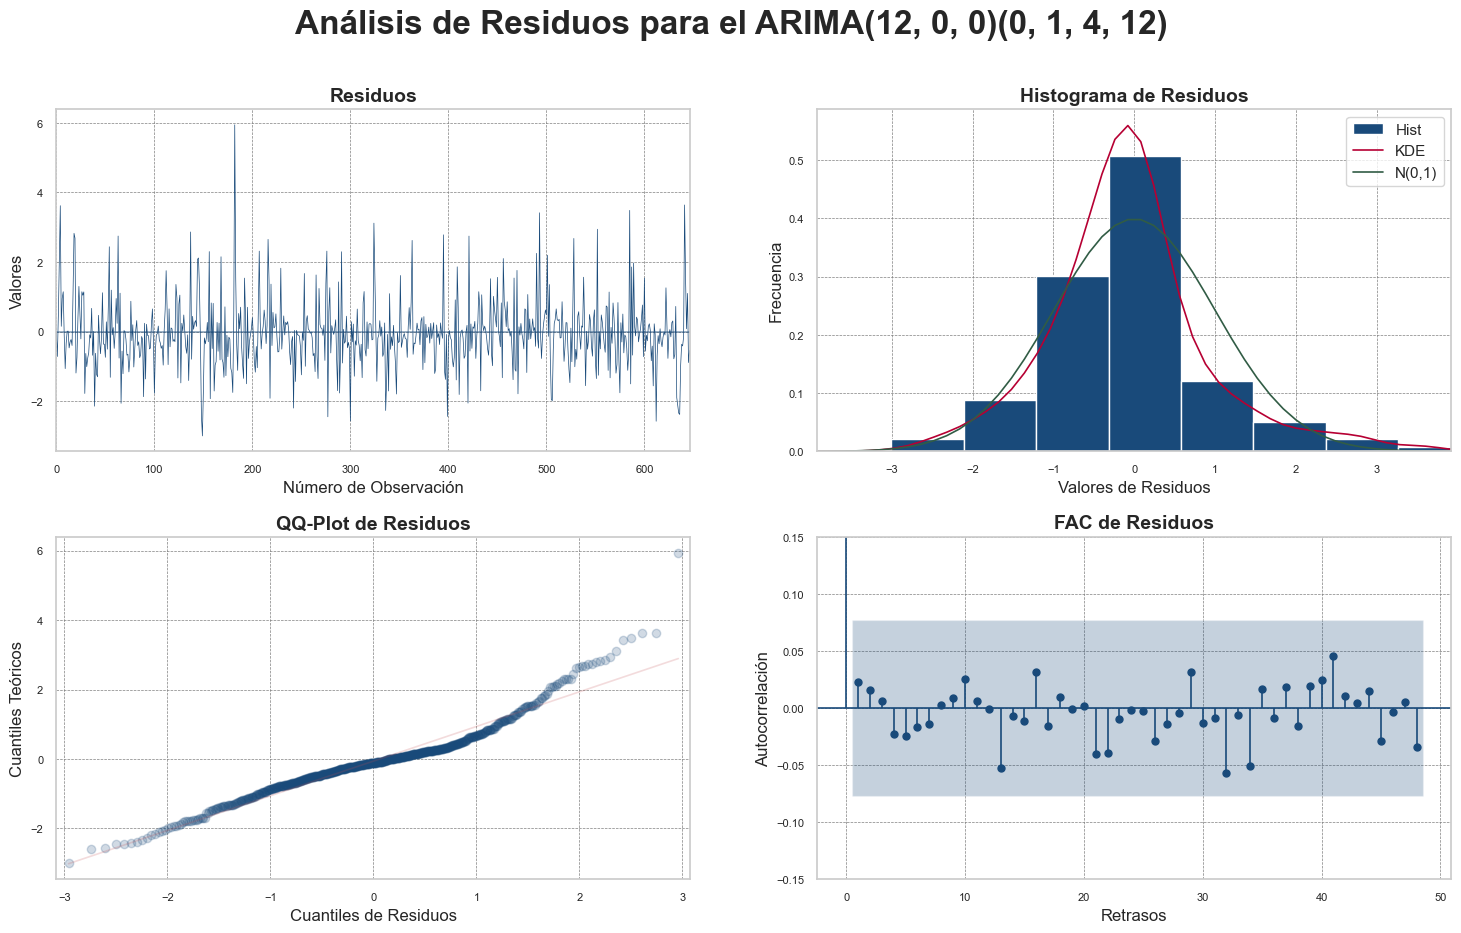

In [47]:
fig = modelo.plot_diagnostics(figsize=(18, 10), lags=48)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("FAC de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Retrasos")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el ARIMA(12, 0, 0)(0, 1, 4, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/04-01-analisis-de-residuos-m1.svg', bbox_inches='tight')
plt.show()


## **2 MODELO**

In [48]:
modelo=SARIMAX(zpre,
               order=(13,0,0),
               seasonal_order=(0,1,4,12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:                                              y   No. Observations:                  660
Model:             SARIMAX(13, 0, 0)x(0, 1, [1, 2, 3, 4], 12)   Log Likelihood                -665.685
Date:                                        Sun, 27 Apr 2025   AIC                           1367.369
Time:                                                04:49:22   BIC                           1447.899
Sample:                                                     0   HQIC                          1398.609
                                                        - 660                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1369      0.035      3.963      0.000       0.069       0.205
ar.L2         -0.0190      0.036     -0.522      0.602      -0.090       0.052
ar.L3          0.0501      0.037      1.363      0.173      -0.022       0.122
ar.L4         -0.0697      0.042     -1.662      0.097      -0.152       0.013
ar.L5         -0.1117      0.050     -2.254      0.024      -0.209      -0.015
ar.L6         -0.1101      0.060     -1.839      0.066      -0.227       0.007
ar.L7         -0.0104      0.051     -0.205      0.838      -0.110       0.089
ar.L8         -0.0511      0.044     -1.170      0.242      -0.137       0.034
ar.L9          0.0331      0.035      0.944      0.345      -0.036       0.102
ar.L10        -0.0093      0.033     -0.281      0.778      -0.074       0.055
ar.L11         0.1034      0.037      2.802      0.005       0.031       0.176
ar.L12         0.5385      0.080      6.699      0.000       0.381       0.696
ar.L13        -0.0460      0.041     -1.115      0.265      -0.127       0.035
ma.S.L12      -1.3756      0.100    -13.725      0.000      -1.572      -1.179
ma.S.L24       0.3674      0.086      4.275      0.000       0.199       0.536
ma.S.L36       0.0973      0.060      1.635      0.102      -0.019       0.214
ma.S.L48      -0.0784      0.039     -1.994      0.046      -0.155      -0.001
sigma2         0.4340      0.030     14.503      0.000       0.375       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               347.08
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.87
Prob(H) (two-sided):                  0.17   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **PRINCIPIO DE PARSIMONIA**

In [49]:
parsimonia(modelo) 

Hay coeficientes no significativos, no se cumple el principio de parsimonia


### **MODELO ADMISIBLE**

In [50]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.13691650540076578, 'p2': 0.01901377784903687, 'p3': -0.0500667165465603, 'p4': 0.069698229094628, 'p5': 0.11171395157927178, 'p6': 0.11009957522513744, 'p7': 0.010425775539985482, 'p8': 0.051137304909435626, 'p9': -0.03308758191153757, 'p10': 0.009267663653695928, 'p11': -0.1033592404899208, 'p12': -0.5385061478654415, 'p13': 0.046023546700947306}

El grado del polinomio es: 13

Raíces del polinomio característico: [11.88851581+0.j         -1.09964507+0.j         -0.92538665+0.52179453j
 -0.92538665-0.52179453j -0.52533631+0.91031656j -0.52533631-0.91031656j
 -0.02218345+1.04735764j -0.02218345-1.04735764j  0.5303036 +0.92193348j
  0.5303036 -0.92193348j  1.06751362+0.j          0.86474363+0.50810694j
  0.86474363-0.50810694j]

Módulo de las raíces: [11.88851581  1.09964507  1.06236057  1.06236057  1.05102544  1.05102544
  1.04759254  1.04759254  1.06357099  1.06357099  1.06751362  1.00297268
  1.00297268]

¿Las raíces están fuera de

In [51]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': -1.3756005193776482, 'p24': 0.3674412910433979, 'p36': 0.09734997881875754, 'p48': -0.07835471066657075}

El grado del polinomio es: 48

Raíces del polinomio característico: [-1.05628158e+00+0.2830298j  -1.05628158e+00-0.2830298j
 -1.06074970e+00+0.06258621j -1.06074970e+00-0.06258621j
 -1.00135998e+00+0.j         -7.73251787e-01+0.77325179j
 -7.73251787e-01-0.77325179j -9.49929287e-01+0.4761736j
 -9.49929287e-01-0.4761736j  -8.87343081e-01+0.58457609j
 -8.87343081e-01-0.58457609j -8.67203179e-01+0.50067999j
 -8.67203179e-01-0.50067999j -5.84576092e-01+0.88734308j
 -5.84576092e-01-0.88734308j -4.76173604e-01+0.94992929j
 -4.76173604e-01-0.94992929j -5.00679989e-01+0.86720318j
 -5.00679989e-01-0.86720318j -2.83029797e-01+1.05628158j
 -2.83029797e-01-1.05628158j -6.25862060e-02+1.0607497j
 -6.25862060e-02-1.0607497j   6.25862060e-02+1.0607497j
  6.25862060e-02-1.0607497j   2.16421979e-16+1.00135998j
  2.16421979e-16-1.00135998j  2.83029797

### **RESIDUOS INDEPENDIENTES**

In [52]:
acorr_ljungbox(modelo.resid, period=24, model_df=len(modelo.params)-1)

,lb_stat,lb_pvalue
1,0.169555,NaN
2,0.204491,NaN
3,0.207502,NaN
4,0.727124,NaN
5,2.068440,NaN
6,2.452464,NaN
7,2.514097,NaN
8,2.809591,NaN
9,3.353825,NaN
10,4.344480,NaN


Hay dependencia en los primeros dos residuos.

### **RESIDUOS CON MEDIA CERO**

In [53]:
modelo.resid.mean()

-0.04384260119451572

In [54]:
ttest_1samp(modelo.resid, 0)

TtestResult(statistic=-1.6518512196908124, pvalue=0.09904125403907901, df=659)

La media de los residuos puede ser 0.

### **RESIDUOS CON VARIANZA CONSTANTE**

In [55]:
het_breuschpagan(modelo.resid, add_constant(np.arange(len(modelo.resid))))

(2.2724202057175913,
 0.1316941016400431,
 2.273361405689974,
 0.13209411797812018)

Los residuos tienen varianza constante.

### **RESIDUOS CON DISTRIBUCIÓN NORMAL**

In [56]:
print(jarque_bera(modelo.resid))
print(lilliefors(modelo.resid))

SignificanceResult(statistic=380.3670597932282, pvalue=2.537128226453911e-83)
(0.11315000343530657, 0.0009999999999998899)


Los residuos no siguen una distribución normal.

In [57]:
normal_relajacion(modelo.resid)

75.15% de los residuos están dentro de ±1σ (esperado ≈ 68%)
93.79% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.94% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


Pero son bastante parecidos.

### **GRÁFICO DE RESIDUOS**

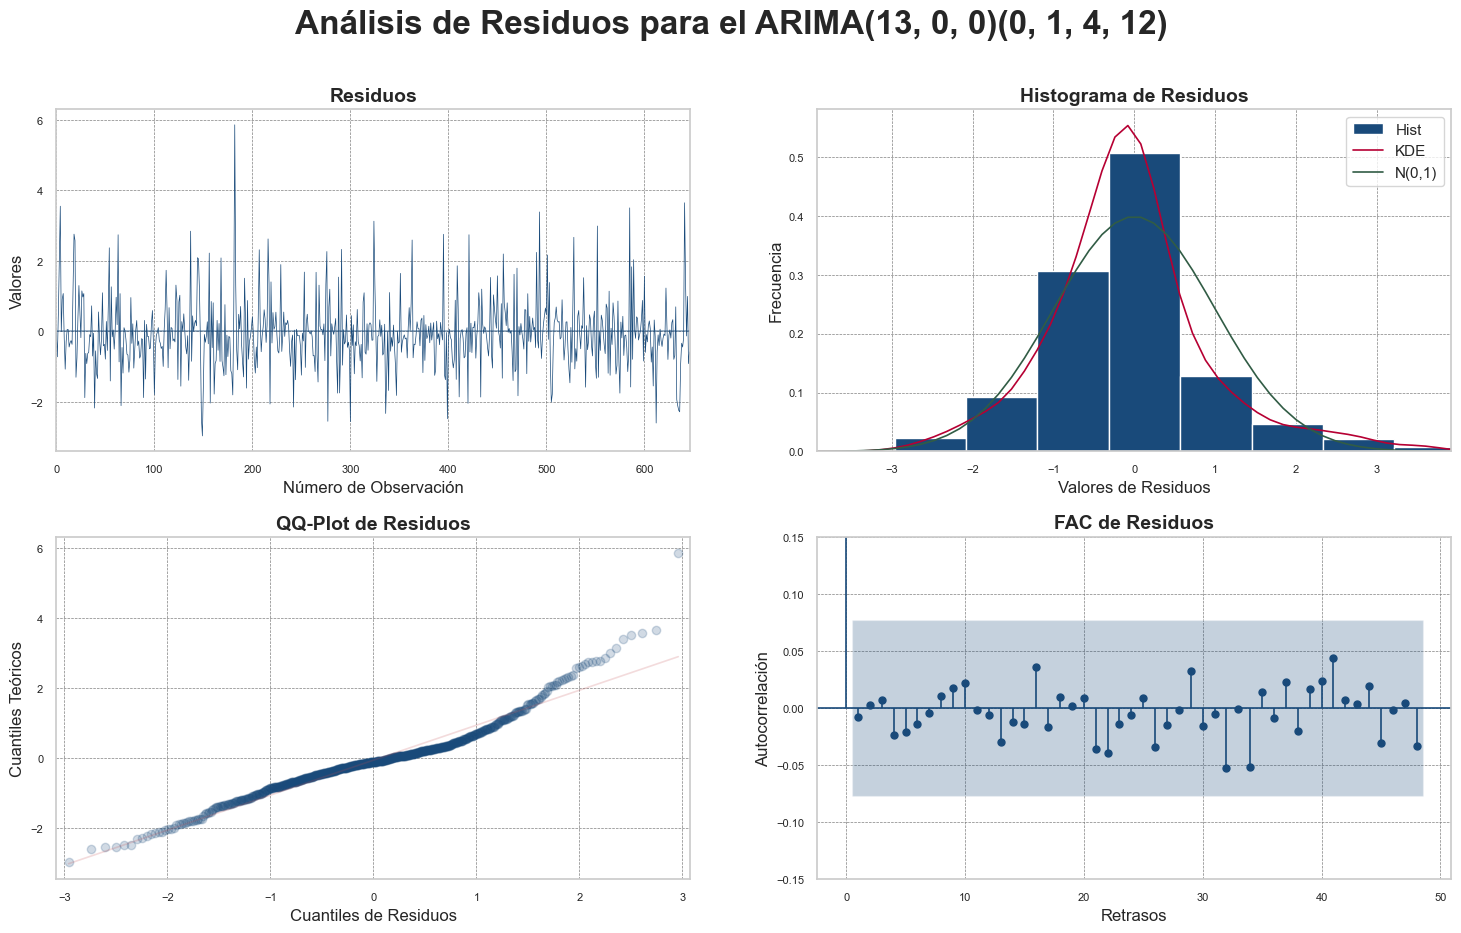

In [58]:
fig = modelo.plot_diagnostics(figsize=(18, 10), lags=48)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("FAC de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Retrasos")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el ARIMA(13, 0, 0)(0, 1, 4, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/04-02-analisis-de-residuos-m2.svg', bbox_inches='tight')
plt.show()


## **3 MODELO**

In [59]:
modelo=SARIMAX(zpre,
               order=(12,0,0),
               seasonal_order=(0,1,2,12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                         
================================================================================================
Dep. Variable:                                        y   No. Observations:                  660
Model:             SARIMAX(12, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -668.499
Date:                                  Sun, 27 Apr 2025   AIC                           1366.998
Time:                                          04:49:32   BIC                           1434.107
Sample:                                               0   HQIC                          1393.032
                                                  - 660                                         
Covariance Type:                                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1241      0.033      3.797      0.000       0.060       0.188
ar.L2         -0.0278      0.037     -0.746      0.455      -0.101       0.045
ar.L3          0.0593      0.036      1.629      0.103      -0.012       0.131
ar.L4         -0.0777      0.043     -1.819      0.069      -0.161       0.006
ar.L5         -0.1077      0.050     -2.137      0.033      -0.206      -0.009
ar.L6         -0.1154      0.060     -1.914      0.056      -0.234       0.003
ar.L7         -0.0107      0.050     -0.214      0.831      -0.108       0.087
ar.L8         -0.0498      0.044     -1.129      0.259      -0.136       0.037
ar.L9          0.0450      0.036      1.263      0.207      -0.025       0.115
ar.L10        -0.0087      0.033     -0.263      0.793      -0.074       0.056
ar.L11         0.1075      0.035      3.042      0.002       0.038       0.177
ar.L12         0.5090      0.073      6.931      0.000       0.365       0.653
ma.S.L12      -1.3374      0.082    -16.355      0.000      -1.498      -1.177
ma.S.L24       0.3550      0.075      4.760      0.000       0.209       0.501
sigma2         0.4394      0.022     20.157      0.000       0.397       0.482
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               385.54
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.91
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **PRINCIPIO DE PARSIMONIA**

In [60]:
parsimonia(modelo) 

Hay coeficientes no significativos, no se cumple el principio de parsimonia


### **MODELO ADMISIBLE**

In [61]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.12409609720857327, 'p2': 0.02784753160299208, 'p3': -0.05931370060464292, 'p4': 0.07773595850485018, 'p5': 0.10769845417883445, 'p6': 0.1153846887487895, 'p7': 0.010651434003279378, 'p8': 0.04983749921571501, 'p9': -0.04496683215549213, 'p10': 0.008718941011892536, 'p11': -0.10747007955137028, 'p12': -0.5090305660410539}

El grado del polinomio es: 12

Raíces del polinomio característico: [-1.12406749+0.j         -0.93496549+0.52952748j -0.93496549-0.52952748j
 -0.52508333+0.91815394j -0.52508333-0.91815394j -0.01640444+1.05341344j
 -0.01640444-1.05341344j  0.53677332+0.92317355j  0.53677332-0.92317355j
  1.06348079+0.j          0.8644098 +0.50791775j  0.8644098 -0.50791775j]

Módulo de las raíces: [1.12406749 1.07450445 1.07450445 1.05769521 1.05769521 1.05354116
 1.05354116 1.06788342 1.06788342 1.06348079 1.00258902 1.00258902]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [62]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': -1.3373896067612656, 'p24': 0.3549819568174022}

El grado del polinomio es: 24

Raíces del polinomio característico: [-1.08759159e+00+0.j         -1.00234440e+00+0.j
 -9.41881945e-01+0.54379579j -9.41881945e-01-0.54379579j
 -8.68055716e-01+0.5011722j  -8.68055716e-01-0.5011722j
 -5.43795795e-01+0.94188195j -5.43795795e-01-0.94188195j
 -5.01172202e-01+0.86805572j -5.01172202e-01-0.86805572j
 -7.34340403e-16+1.08759159j -7.34340403e-16-1.08759159j
  9.15927823e-17+1.0023444j   9.15927823e-17-1.0023444j
  5.43795795e-01+0.94188195j  5.43795795e-01-0.94188195j
  5.01172202e-01+0.86805572j  5.01172202e-01-0.86805572j
  9.41881945e-01+0.54379579j  9.41881945e-01-0.54379579j
  1.08759159e+00+0.j          1.00234440e+00+0.j
  8.68055716e-01+0.5011722j   8.68055716e-01-0.5011722j ]

Módulo de las raíces: [1.08759159 1.0023444  1.08759159 1.08759159 1.0023444  1.0023444
 1.08759159 1.08759159 1.0023444  1.0023444  1.08759159 1.08759159
 1.0023444 

### **RESIDUOS INDEPENDIENTES**

In [63]:
acorr_ljungbox(modelo.resid, period=24, model_df=len(modelo.params)-1)

,lb_stat,lb_pvalue
1,0.852590,NaN
2,1.026959,NaN
3,1.042580,NaN
4,1.330274,NaN
5,2.702490,NaN
6,2.993605,NaN
7,3.102314,NaN
8,3.441180,NaN
9,3.616131,NaN
10,4.475840,NaN


Hay dependencia en los primeros dos residuos.

### **RESIDUOS CON MEDIA CERO**

In [64]:
modelo.resid.mean()

-0.03975299918077584

In [65]:
ttest_1samp(modelo.resid, 0)

TtestResult(statistic=-1.4907248613412258, pvalue=0.1365122225435534, df=659)

La media de los residuos puede ser 0.

### **RESIDUOS CON VARIANZA CONSTANTE**

In [66]:
het_breuschpagan(modelo.resid, add_constant(np.arange(len(modelo.resid))))

(2.3477675031968714,
 0.12546257027135715,
 2.3490090062319307,
 0.1258433113034253)

Los residuos tienen varianza constante.

### **RESIDUOS CON DISTRIBUCIÓN NORMAL**

In [67]:
print(jarque_bera(modelo.resid))
print(lilliefors(modelo.resid))

SignificanceResult(statistic=421.16509310160836, pvalue=3.508827740565011e-92)
(0.10731720679113188, 0.0009999999999998899)


Los residuos no siguen una distribución normal.

In [68]:
normal_relajacion(modelo.resid)

75.15% de los residuos están dentro de ±1σ (esperado ≈ 68%)
94.09% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.79% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


Pero son bastante parecidos.

### **GRÁFICO DE RESIDUOS**

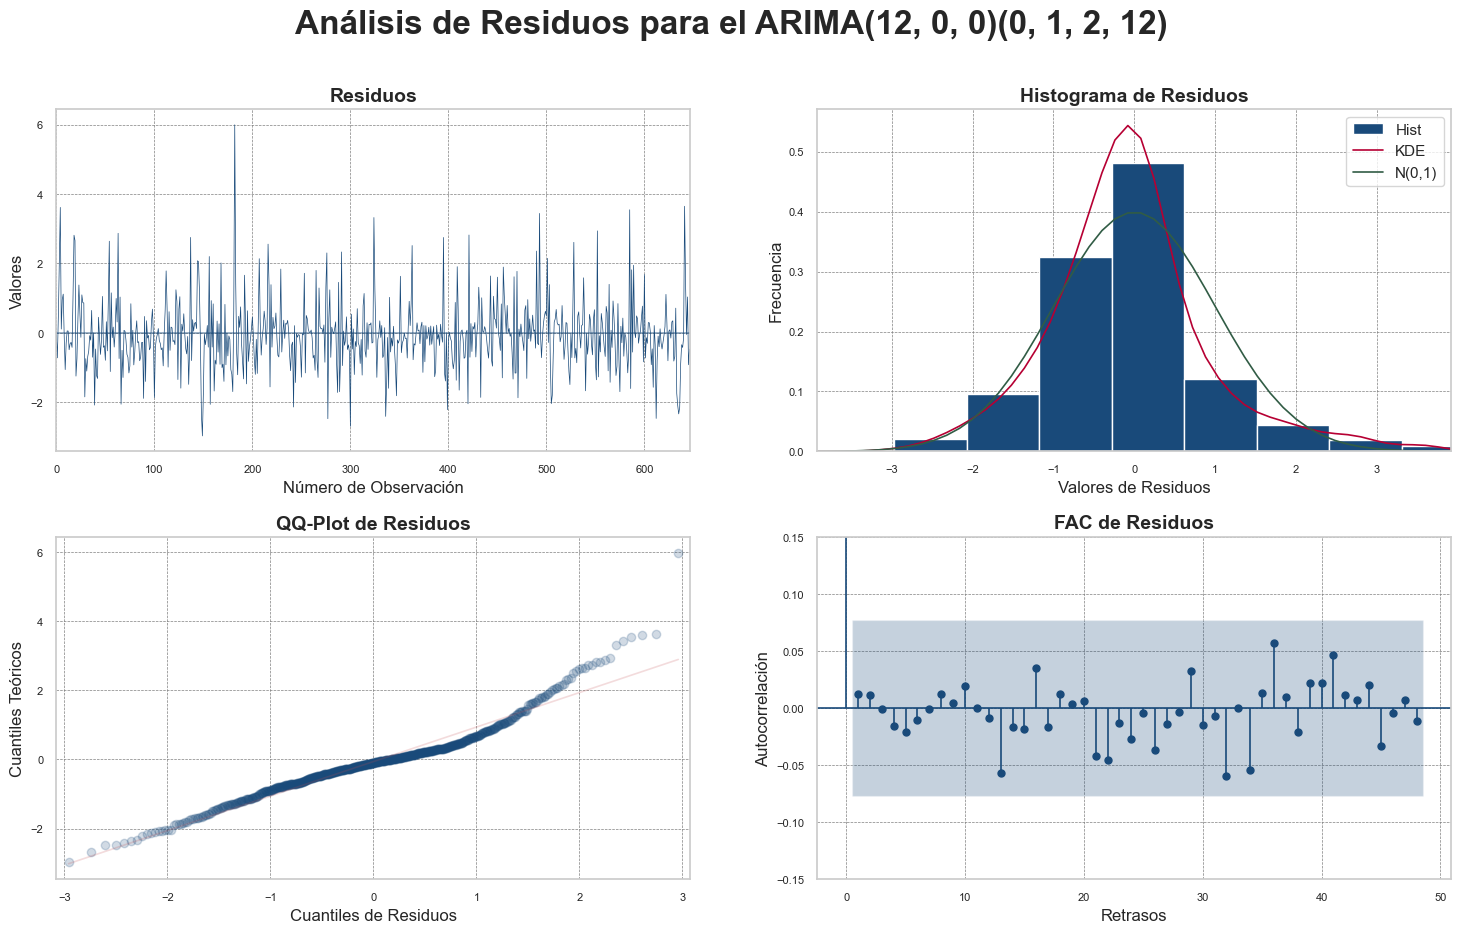

In [69]:
fig = modelo.plot_diagnostics(figsize=(18, 10), lags=48)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("FAC de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Retrasos")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el ARIMA(12, 0, 0)(0, 1, 2, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/04-03-analisis-de-residuos-m3.svg', bbox_inches='tight')
plt.show()


## **MODELOS QUE SE CREYÓ QUE PODÍAN SER**

Luego de ver la FAC y FACP:

In [70]:
fac = FAC(len(dzpre), acf(dzpre, nlags=12*12)[1:] )

Valores de autocorrelacion significativos:
r1: 0.08495427799538309
r5: -0.09455404757011152
r12: -0.41418332950296094
r69: 0.13811523521698316
r73: -0.11256100076387932
r82: -0.09936326169869977
r139: 0.10081286249593209
r144: -0.103722152043645


In [71]:
facp = FACP(len(dzpre), pacf(dzpre, nlags=12*10)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.08508558290727704
rho 5: -0.08389897753926691
rho 12: -0.43583220424270375
rho 17: -0.12023508334631484
rho 24: -0.30097443805877616
rho 29: -0.10198920198664936
rho 36: -0.15950168604080825
rho 48: -0.14036369491687153
rho 57: -0.09168717760514207
rho 60: -0.1239606605892366
rho 61: 0.13800141862943802
rho 69: 0.10269095820413282
rho 72: -0.09462958643919699
rho 82: -0.08002594037040578
rho 85: -0.08198325512480845
rho 93: 0.092203788733838
rho 109: 0.09582379018763891
rho 113: -0.09105599732819755
rho 119: 0.09171771966671013
rho 120: -0.13558724808031059


Tambien se pensó que podía ser este modelo, pero es muy malo.

In [72]:
modelo=SARIMAX(zpre,
               order=([1,5],0,[1,5]),
               seasonal_order=([1],1,[1,2],12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                            y   No. Observations:                  660
Model:             SARIMAX([1, 5], 0, [1, 5])x(1, 1, 2, 12)   Log Likelihood                  -5.099
Date:                                      Sun, 27 Apr 2025   AIC                             26.198
Time:                                              04:51:06   BIC                             61.990
Sample:                                                   0   HQIC                            40.083
                                                      - 660                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1476     32.468      0.035      0.972     -62.489      64.784
ar.L5         -0.8775     38.486     -0.023      0.982     -76.308      74.553
ma.L1         -0.9317     23.880     -0.039      0.969     -47.736      45.872
ma.L5          0.3314     36.742      0.009      0.993     -71.681      72.344
ar.S.L12      -0.3697    133.649     -0.003      0.998    -262.317     261.577
ma.S.L12      -0.1630     41.007     -0.004      0.997     -80.536      80.210
ma.S.L24      -0.7558     42.337     -0.018      0.986     -83.735      82.223
sigma2         0.4434      8.359      0.053      0.958     -15.941      16.827
===================================================================================
Ljung-Box (L1) (Q):                 294.50   Jarque-Bera (JB):           2134861.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            15.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       282.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.39e+17. Standard errors may be unstable.
"""

In [73]:
modelo.resid.mean()

-7.786026841214317e+48

También este, pero no es invertible

In [74]:
modelo=SARIMAX(zpre,
               order=(0,0, [5]),
               seasonal_order=(1,1,[1,2],12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                                         y   No. Observations:                  660
Model:             SARIMAX(0, 0, [5])x(1, 1, [1, 2], 12)   Log Likelihood                -708.534
Date:                                   Sun, 27 Apr 2025   AIC                           1427.068
Time:                                           04:51:13   BIC                           1449.437
Sample:                                                0   HQIC                          1435.745
                                                   - 660                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L5         -0.1707      0.044     -3.861      0.000      -0.257      -0.084
ar.S.L12      -0.8858      0.147     -6.011      0.000      -1.175      -0.597
ma.S.L12       0.2236      0.140      1.599      0.110      -0.050       0.498
ma.S.L24      -0.6343      0.088     -7.209      0.000      -0.807      -0.462
sigma2         0.5151      0.019     27.358      0.000       0.478       0.552
===================================================================================
Ljung-Box (L1) (Q):                  10.39   Jarque-Bera (JB):               283.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.66
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p5': -0.17066687867489047, 'p12': 0.2235561375559531, 'p24': -0.6342522946355272}

El grado del polinomio es: 24

Raíces del polinomio característico: [-1.03809773+0.j         -0.97339645+0.26906311j -0.97339645-0.26906311j
 -0.88525875+0.51576505j -0.88525875-0.51576505j -0.71259807+0.7035491j
 -0.71259807-0.7035491j  -0.52270681+0.89327539j -0.52270681-0.89327539j
 -0.26081491+0.98110341j -0.26081491-0.98110341j  0.00733524+1.03148712j
  0.00733524-1.03148712j  1.02333621+0.j          0.97341295+0.25216589j
  0.97341295-0.25216589j  0.89999742+0.51572558j  0.89999742-0.51572558j
  0.71256537+0.7204749j   0.71256537-0.7204749j   0.50801366+0.89331475j
  0.50801366-0.89331475j  0.2608311 +0.96414954j  0.2608311 -0.96414954j]

Módulo de las raíces: [1.03809773 1.0098988  1.0098988  1.02454704 1.02454704 1.00138771
 1.00138771 1.0349702  1.0349702  1.01517895 1.01517895 1.03151321
 1.03151321 1.02333621 1.00554483 1.00554483 1.03728888 1.0372888

también este, pero no es invertible.

In [76]:
modelo=SARIMAX(zpre,
               order=([12],0, [5]),
               seasonal_order=(0,1,[1,2],12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                            y   No. Observations:                  660
Model:             SARIMAX([12], 0, [5])x(0, 1, [1, 2], 12)   Log Likelihood                -708.534
Date:                                      Sun, 27 Apr 2025   AIC                           1427.068
Time:                                              04:51:22   BIC                           1449.437
Sample:                                                   0   HQIC                          1435.745
                                                      - 660                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L12        -0.8858      0.147     -6.011      0.000      -1.175      -0.597
ma.L5         -0.1707      0.044     -3.861      0.000      -0.257      -0.084
ma.S.L12       0.2236      0.140      1.599      0.110      -0.050       0.498
ma.S.L24      -0.6343      0.088     -7.208      0.000      -0.807      -0.462
sigma2         0.5151      0.019     27.358      0.000       0.478       0.552
===================================================================================
Ljung-Box (L1) (Q):                  10.39   Jarque-Bera (JB):               283.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.66
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p5': -0.1706643002131486, 'p12': 0.22358740803256344, 'p24': -0.6342671085676491}

El grado del polinomio es: 24

Raíces del polinomio característico: [-1.03809804+0.j         -0.97339404+0.26906235j -0.97339404-0.26906235j
 -0.88525946+0.5157653j  -0.88525946-0.5157653j  -0.71259631+0.70354748j
 -0.71259631-0.70354748j -0.52270685+0.89327583j -0.52270685-0.89327583j
 -0.26081426+0.98110091j -0.26081426-0.98110091j  0.00733501+1.03148763j
  0.00733501-1.03148763j  1.023337  +0.j          0.97341054+0.25216538j
  0.97341054-0.25216538j  0.89999765+0.51572583j  0.89999765-0.51572583j
  0.7125636 +0.72047304j  0.7125636 -0.72047304j  0.50801417+0.89331519j
  0.50801417-0.89331519j  0.26083046+0.96414729j  0.26083046-0.96414729j]

Módulo de las raíces: [1.03809804 1.00989628 1.00989628 1.02454778 1.02454778 1.00138532
 1.00138532 1.0349706  1.0349706  1.01517637 1.01517637 1.03151371
 1.03151371 1.023337   1.00554237 1.00554237 1.03728921 1.037289

# **MODELO SELECCIONADO**

$$\text{ARIMA}(13, 0, 0)(0, 1, 4)_{12} $$

Nos quedamos con este modelo porque es el que tiene los p-valores más altos en la prueba de independencia de los residuos.

In [78]:
modelo = SARIMAX(zpre,
                  order=(13, 0, 0),
                  seasonal_order=(0, 1, 4, 12)).fit()

modelo.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:                                              y   No. Observations:                  660
Model:             SARIMAX(13, 0, 0)x(0, 1, [1, 2, 3, 4], 12)   Log Likelihood                -665.685
Date:                                        Sun, 27 Apr 2025   AIC                           1367.369
Time:                                                04:52:22   BIC                           1447.899
Sample:                                                     0   HQIC                          1398.609
                                                        - 660                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1369      0.035      3.963      0.000       0.069       0.205
ar.L2         -0.0190      0.036     -0.522      0.602      -0.090       0.052
ar.L3          0.0501      0.037      1.363      0.173      -0.022       0.122
ar.L4         -0.0697      0.042     -1.662      0.097      -0.152       0.013
ar.L5         -0.1117      0.050     -2.254      0.024      -0.209      -0.015
ar.L6         -0.1101      0.060     -1.839      0.066      -0.227       0.007
ar.L7         -0.0104      0.051     -0.205      0.838      -0.110       0.089
ar.L8         -0.0511      0.044     -1.170      0.242      -0.137       0.034
ar.L9          0.0331      0.035      0.944      0.345      -0.036       0.102
ar.L10        -0.0093      0.033     -0.281      0.778      -0.074       0.055
ar.L11         0.1034      0.037      2.802      0.005       0.031       0.176
ar.L12         0.5385      0.080      6.699      0.000       0.381       0.696
ar.L13        -0.0460      0.041     -1.115      0.265      -0.127       0.035
ma.S.L12      -1.3756      0.100    -13.725      0.000      -1.572      -1.179
ma.S.L24       0.3674      0.086      4.275      0.000       0.199       0.536
ma.S.L36       0.0973      0.060      1.635      0.102      -0.019       0.214
ma.S.L48      -0.0784      0.039     -1.994      0.046      -0.155      -0.001
sigma2         0.4340      0.030     14.503      0.000       0.375       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               347.08
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.87
Prob(H) (two-sided):                  0.17   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **MÉTODO FORECAST**

In [79]:
# Pronóstico para 12 meses hacia el futuro
forecast = modelo.forecast(steps=12)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [80]:
# Obtener pronóstico con intervalos
pred = modelo.get_forecast(steps=12)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [81]:
# Media pronosticada
forecast_mean = pred.predicted_mean
forecast_mean

660   -0.271631
661   -0.661901
662   -0.654961
663   -0.143030
664    0.037530
665    0.691594
666    0.525770
667    0.547976
668    0.546302
669   -0.052463
670   -0.533933
671   -0.498900
Name: predicted_mean, dtype: float64

In [82]:
# aplicar la inversa de la estandarización
# Calcular media y desviación estándar de la serie original
mu = np.mean(pre)
sigma = np.std(pre, ddof=0)  # ddof=0 porque así lo usa scipy.stats.zscore por default

# Desestandarizar
forecast_mean = forecast_mean * sigma + mu
forecast_mean 

660     544.857515
661     201.246199
662     207.357090
663     658.083539
664     817.056418
665    1392.924027
666    1246.924820
667    1266.476037
668    1265.002200
669     737.822995
670     313.915173
671     344.759688
Name: predicted_mean, dtype: float64

In [83]:
forecast_mean 

660     544.857515
661     201.246199
662     207.357090
663     658.083539
664     817.056418
665    1392.924027
666    1246.924820
667    1266.476037
668    1265.002200
669     737.822995
670     313.915173
671     344.759688
Name: predicted_mean, dtype: float64

In [84]:
# Intervalos de confianza
int_conf = pred.conf_int()
int_conf

,lower y,upper y
660,-1.566687,1.023425
661,-1.969017,0.645214
662,-1.962076,0.652155
663,-1.451584,1.165524
664,-1.273046,1.348105
665,-0.629675,2.012863
666,-0.807778,1.859318
667,-0.787023,1.882975
668,-0.791284,1.883888
669,-1.390333,1.285407


In [85]:
# Desestandarizar los intervalos de confianza
int_conf = int_conf * sigma + mu
int_conf

,lower y,upper y
660,-595.367749,1685.082779
661,-949.596462,1352.088860
662,-943.485554,1358.199735
663,-494.026019,1810.193098
664,-336.832977,1970.945813
665,229.619785,2556.228270
666,72.809546,2421.040094
667,91.083533,2441.868542
668,87.331818,2442.672581
669,-440.097428,1915.743419


In [86]:
# Asignar los índices de fecha a los intervalos de confianza
forecast_index = pd.date_range(start=pre.index[-2], periods=13, freq='ME')[1:]

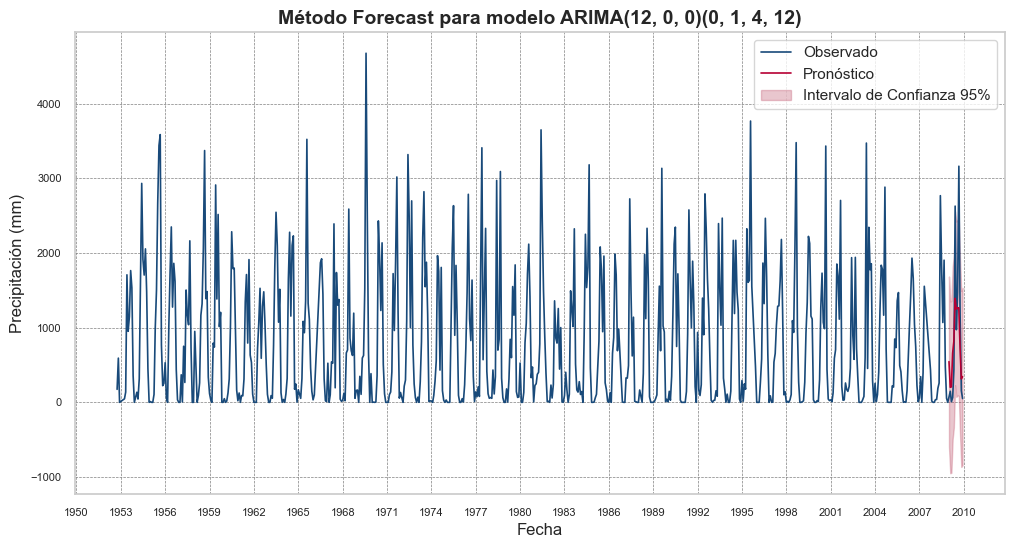

In [87]:
plt.figure()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12*3))  # Pone cada 3 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))     # Formato de fecha

# Serie original
plt.plot(pre_total, label='Observado')

# Pronóstico
plt.plot(forecast_index, forecast_mean, label='Pronóstico', color=sns.color_palette()[1])

# Intervalos
plt.fill_between(forecast_index,
                    int_conf.iloc[:, 0], int_conf.iloc[:, 1], 
                    color=sns.color_palette()[4], alpha=0.3, label='Intervalo de Confianza 95%')

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")

plt.legend()
plt.title('Método Forecast para modelo ARIMA(12, 0, 0)(0, 1, 4, 12)')
plt.savefig('imagenes/05-01-metodo-forecast.svg', bbox_inches='tight')
plt.show()

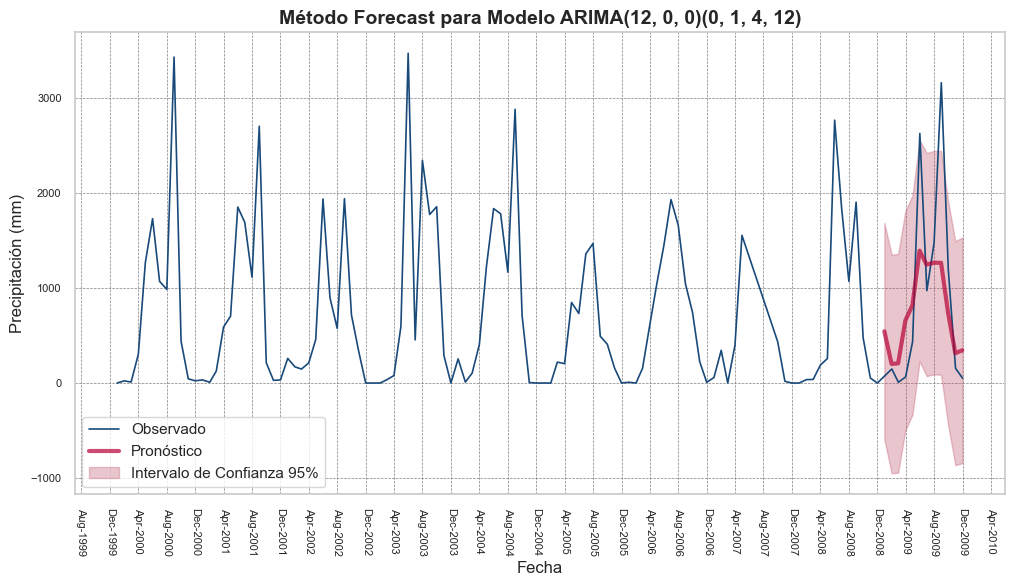

In [88]:
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Pone cada 4 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))   # Formato de fecha

# Filtrar la serie original para mostrar solo desde el año 2000
obs = pre_total[pre_total.index >= '2000-01-01']

# Plotear las series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, forecast_mean , label='Pronóstico', color=sns.color_palette()[1], linewidth=3, alpha=0.7)

# Intervalos
plt.fill_between(forecast_index,
                    int_conf.iloc[:, 0], int_conf.iloc[:, 1], 
                    color=sns.color_palette()[4], alpha=0.3, label='Intervalo de Confianza 95%')

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")


plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Método Forecast para Modelo ARIMA(12, 0, 0)(0, 1, 4, 12)')
# plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/05-02-metodo-forecast-zoom.svg', bbox_inches='tight')
plt.show()

# **PRONÓSTICO ÓPTIMO**

Se calcula en 04-Calculo-del-Pronostico-Optimo

In [89]:
pre_total.to_csv('04-01-Serie-Original.csv', index=False) # Guardar la serie original
modelo.resid.to_csv('04-02-Serie-Residuos.csv', index=False) # Guardar la serie de residuos

In [90]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:                                              y   No. Observations:                  660
Model:             SARIMAX(13, 0, 0)x(0, 1, [1, 2, 3, 4], 12)   Log Likelihood                -665.685
Date:                                        Sun, 27 Apr 2025   AIC                           1367.369
Time:                                                04:52:23   BIC                           1447.899
Sample:                                                     0   HQIC                          1398.609
                                                        - 660                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1369      0.035      3.963      0.000       0.069       0.205
ar.L2         -0.0190      0.036     -0.522      0.602      -0.090       0.052
ar.L3          0.0501      0.037      1.363      0.173      -0.022       0.122
ar.L4         -0.0697      0.042     -1.662      0.097      -0.152       0.013
ar.L5         -0.1117      0.050     -2.254      0.024      -0.209      -0.015
ar.L6         -0.1101      0.060     -1.839      0.066      -0.227       0.007
ar.L7         -0.0104      0.051     -0.205      0.838      -0.110       0.089
ar.L8         -0.0511      0.044     -1.170      0.242      -0.137       0.034
ar.L9          0.0331      0.035      0.944      0.345      -0.036       0.102
ar.L10        -0.0093      0.033     -0.281      0.778      -0.074       0.055
ar.L11         0.1034      0.037      2.802      0.005       0.031       0.176
ar.L12         0.5385      0.080      6.699      0.000       0.381       0.696
ar.L13        -0.0460      0.041     -1.115      0.265      -0.127       0.035
ma.S.L12      -1.3756      0.100    -13.725      0.000      -1.572      -1.179
ma.S.L24       0.3674      0.086      4.275      0.000       0.199       0.536
ma.S.L36       0.0973      0.060      1.635      0.102      -0.019       0.214
ma.S.L48      -0.0784      0.039     -1.994      0.046      -0.155      -0.001
sigma2         0.4340      0.030     14.503      0.000       0.375       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               347.08
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.87
Prob(H) (two-sided):                  0.17   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
modelo.params

ar.L1       0.136917
ar.L2      -0.019014
ar.L3       0.050067
ar.L4      -0.069698
ar.L5      -0.111714
ar.L6      -0.110100
ar.L7      -0.010426
ar.L8      -0.051137
ar.L9       0.033088
ar.L10     -0.009268
ar.L11      0.103359
ar.L12      0.538506
ar.L13     -0.046024
ma.S.L12   -1.375601
ma.S.L24    0.367441
ma.S.L36    0.097350
ma.S.L48   -0.078355
sigma2      0.434001
dtype: float64

$$
\text{ARIMA}(13,0,0) \times (0,1,4)_{12} \text{ para $X_t$}
$$

con coeficientes:

- $\phi_1 = -0.136917$
- $\phi_2 = 0.019014$
- $\phi_3 = -0.050067$
- $\phi_4 = 0.069698$
- $\phi_5 = 0.111714$
- $\phi_6 = 0.110100$
- $\phi_7 = 0.010426$
- $\phi_8 = 0.051137$
- $\phi_9 = -0.033088$
- $\phi_{10} = 0.009268$
- $\phi_{11} = -0.103359$
- $\phi_{12} = -0.538506$
- $\phi_{13} = 0.046024$

y para la parte estacional MA:

- $\Theta_1 = 1.375601$
- $\Theta_2 = -0.367441$
- $\Theta_3 = -0.097350$
- $\Theta_4 = 0.078355$

$$
\Phi_0(B^{12}) \, \phi_13(B) \, \nabla^0 \nabla_{12}^1 X_t = \Theta_4(B^{12}) \, \theta_0(B) \, \varepsilon_t,
$$

Donde $\varepsilon_t \sim \mathcal{N}(0, 1)$

### **Desarrollo para el pronóstico óptimo**

Del lado izquierdo:

$$
(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_{13} B^{13})(X_t - X_{t-12}) = 
X_t - X_{t-12} - \phi_1 (X_{t-1} - X_{t-13}) - \phi_2 (X_{t-2} - X_{t-14}) - \cdots - \phi_{13}(X_{t-13} - X_{t-25})
$$

$$
= X_t - X_{t-12} - \sum_{h=1}^{13} \phi_k (X_{t-h} - X_{t-h-12})
$$

Del lado derecho:

$$
(1 - \Theta_1 B^{12} - \Theta_2 B^{24} - \Theta_3 B^{36} - \Theta_4 B^{48})\varepsilon_t = 
\varepsilon_t - \Theta_1 \varepsilon_{t-12} - \Theta_2 \varepsilon_{t-24} - \Theta_3 \varepsilon_{t-36} - \Theta_4 \varepsilon_{t-48}
$$

despejando $X_t$:

$$
X_t = X_{t-12} + \sum_{k=1}^{13} \phi_k (X_{t-k} - X_{t-k-12}) + 
\varepsilon_t - \Theta_1 \varepsilon_{t-12} - \Theta_2 \varepsilon_{t-24} - \Theta_3 \varepsilon_{t-36} - \Theta_4 \varepsilon_{t-48}
$$

Por lo que, el pronóstico óptimo sería:

$$
X_t(h) = 
\underset{t}{\mathbb{E}}[X_{t+h-12}] 
+ \sum_{k=1}^{13} \phi_k \left( \underset{t}{\mathbb{E}}[X_{t+h-k}] - \underset{t}{\mathbb{E}}[X_{t+h-k-12}] \right)
+ \underset{t}{\mathbb{E}}[\varepsilon_{t+h}] 
- \sum_{j=1}^4 \Theta_j \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-12j}]
$$

In [91]:
# Intervalo de Predicción
# Pronosntico optimo[i] +- 1.96*(suma de psis)^{1/2}*std(residuos)

# Calcula de las espis
psi0 = -1

# psi[i] = teta[i] + Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d] si i=1,2,...,q
# psi[i] = Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d]           si i>q


In [92]:
# pronostico optimo 04-Calculo-del-Pronostico-Optimo

# 893.2021421
# 218.8353082
# 14.55589463
# 46.06671573
# 102.6854446
# 909.4688428
# 328.2252003
# 431.4633135
# 1179.309604
# 567.0569539
# 460.930121
# 514.9098934

# Guardarlos en una serie

pronostico_optimo = pd.Series([893.2021421, 218.8353082, 14.55589463, 46.06671573, 102.6854446, 909.4688428, 328.2252003, 431.4633135, 1179.309604, 567.0569539, 460.930121, 514.9098934],
                            index=pd.date_range(start='2009-01-01', periods=12, freq='ME'))

In [93]:
# Intervalo de Predicción
# Pronosntico optimo[i] +- 1.96*(suma de psis)^{1/2}*std(residuos)

# Calcula de las espis
psi0 = -1

# psi[i] = teta[i] + Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d] si i=1,2,...,q
# psi[i] = Phi[1]*psi[i-1] + Phi[2]*psi[i-2] + ... + Phi[p+d]*psi[i-p-d]           si i>q

phi1 = modelo.params[0]
teta12 = modelo.params[1]

psi1 = phi1*psi0
psi2 = phi1*psi1
psi3 = phi1*psi2 
psi4 = phi1*psi3
psi5 = phi1*psi4
psi6 = phi1*psi5
psi7 = phi1*psi6
psi8 = phi1*psi7
psi9 = phi1*psi8
psi10 = phi1*psi9
psi11 = phi1*psi10
psi12 = phi1*psi11 + teta12

C:\Users\herie\AppData\Local\Temp\ipykernel_8528\294999966.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi1 = modelo.params[0]
C:\Users\herie\AppData\Local\Temp\ipykernel_8528\294999966.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  teta12 = modelo.params[1]


In [94]:
psis = [psi0, psi1, psi2, psi3, psi4, psi5, psi6, psi7, psi8, psi9, psi10, psi11, psi12]

In [95]:
sigmax = np.std(modelo.resid, ddof=0)  # ddof=0 porque así lo usa scipy.stats.zscore por default

In [96]:
# 1.96 es el valor crítico para un intervalo de confianza del 95%

# primer intervalo
u0 = pronostico_optimo[0] + 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l0 = pronostico_optimo[0] - 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# segundo intervalo
u1 = pronostico_optimo[1] + 1.96*(psis[0]**2+psis[1]**2)**(1/2)*sigmax # 218.8353082 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l1 = pronostico_optimo[1] - 1.96*(psis[0]**2+psis[1]**2)**(1/2)*sigmax # 218.8353082 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# tercer intervalo
u2 = pronostico_optimo[2] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2)**(1/2)*sigmax # 14.55589463 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l2 = pronostico_optimo[2] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2)**(1/2)*sigmax # 14.55589463 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# cuarto intervalo
u3 = pronostico_optimo[3] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2)**(1/2)*sigmax # 46.06671573 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l3 = pronostico_optimo[3] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2)**(1/2)*sigmax # 46.06671573 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# quinto intervalo
u4 = pronostico_optimo[4] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2)**(1/2)*sigmax # 102.6854446 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l4 = pronostico_optimo[4] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2)**(1/2)*sigmax # 102.6854446 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# sexto intervalo
u5 = pronostico_optimo[5] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2)**(1/2)*sigmax # 909.4688428 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l5 = pronostico_optimo[5] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2)**(1/2)*sigmax # 909.4688428 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# septimo intervalo
u6 = pronostico_optimo[6] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2)**(1/2)*sigmax # 328.2252003 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l6 = pronostico_optimo[6] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2)**(1/2)*sigmax # 328.2252003 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# octavo intervalo
u7 = pronostico_optimo[7] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2)**(1/2)*sigmax # 431.4633135 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l7 = pronostico_optimo[7] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2)**(1/2)*sigmax # 431.4633135 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# noveno intervalo
u8 = pronostico_optimo[8] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2)**(1/2)*sigmax # 1179.309604 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l8 = pronostico_optimo[8] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2)**(1/2)*sigmax # 1179.309604 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# decimo intervalo
u9 = pronostico_optimo[9] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2)**(1/2)*sigmax # 567.0569539 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l9 = pronostico_optimo[9] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2)**(1/2)*sigmax # 567.0569539 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# decimo primero intervalo
u10 = pronostico_optimo[10] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2)**(1/2)*sigmax # 460.930121 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l10 = pronostico_optimo[10] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2)**(1/2)*sigmax # 460.930121 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

# decimo segundo intervalo
u11 = pronostico_optimo[11] + 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2+psis[11]**2)**(1/2)*sigmax # 514.9098934 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
l11 = pronostico_optimo[11] - 1.96*(psis[0]**2+psis[1]**2+psis[2]**2+psis[3]**2+psis[4]**2+psis[5]**2+psis[6]**2+psis[7]**2+psis[8]**2+psis[9]**2+psis[10]**2+psis[11]**2)**(1/2)*sigmax # 514.9098934 - 1.96*(sum(psis))**(1/2)*np.std(residuos)

C:\Users\herie\AppData\Local\Temp\ipykernel_8528\1821909374.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  u0 = pronostico_optimo[0] + 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 + 1.96*(sum(psis))**(1/2)*np.std(residuos)
C:\Users\herie\AppData\Local\Temp\ipykernel_8528\1821909374.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l0 = pronostico_optimo[0] - 1.96*(psis[0]**2)**(1/2)*sigmax # 893.2021421 - 1.96*(sum(psis))**(1/2)*np.std(residuos)
C:\Users\herie\AppData\Local\Temp\ipykernel_8528\1821909374.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

In [97]:
# Guardar los resultados en un dataframe
pronostico_optimo_df = pd.DataFrame({
    'Pronóstico': pronostico_optimo,
    'Límite Inferior': [l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11],
    'Límite Superior': [u0, u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11]
}, index=pronostico_optimo.index)

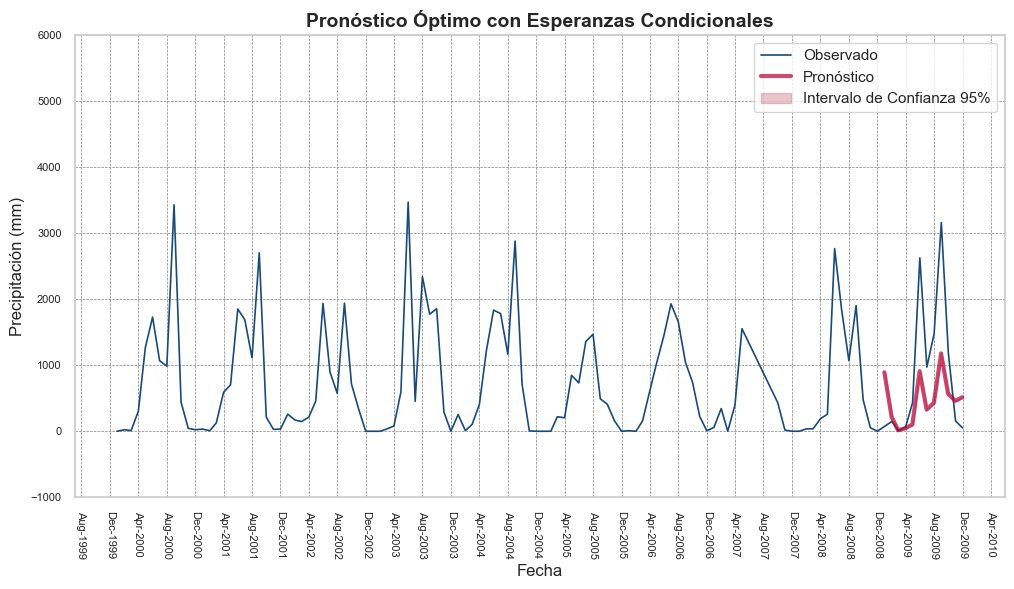

In [98]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Pone cada 4 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))   # Formato de fecha

# Filtrar la serie original para mostrar solo desde el año 2000
obs = pre_total[pre_total.index >= '2000-01-01']

# Plottear las series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, pronostico_optimo, label='Pronóstico', color=sns.color_palette()[1], linewidth=3, alpha=0.7)

# Intervalos
plt.fill_between(forecast_index,
                    pronostico_optimo_df['Límite Inferior'], pronostico_optimo_df['Límite Superior'], 
                    color=sns.color_palette()[4], alpha=0.3, label='Intervalo de Confianza 95%')

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico Óptimo con Esperanzas Condicionales')
plt.ylim(-1000, 6000)
plt.grid(True)
plt.savefig('imagenes/05-03-pronostico-optimo.svg', bbox_inches='tight')
plt.show()

# **COMPARACIÓN**

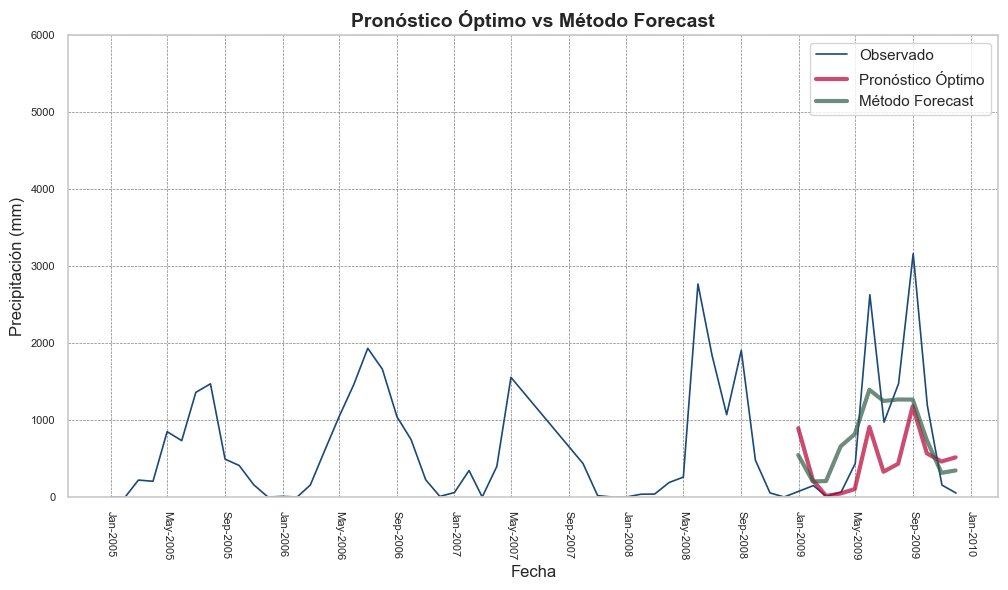

In [107]:
# Comparar el pronóstico óptimo con el pronóstico del modelo SARIMAX

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Pone cada 4 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))   # Formato de fecha

# Filtrar la serie original para mostrar solo desde el año 2000
obs = pre_total[pre_total.index >= '2005-01-01']

# Plottear las series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, pronostico_optimo, label='Pronóstico Óptimo', color=sns.color_palette()[1], linewidth=3, alpha=0.7)
plt.plot(forecast_index, forecast_mean, label='Método Forecast', color=sns.color_palette()[2], linewidth=3, alpha=0.7)

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico Óptimo vs Método Forecast')
plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/05-04-comparacion.svg', bbox_inches='tight')
plt.show()

# **ACTUALIZACIÓN DE PRONÓSTICO**

In [100]:
# Conseguimos la primera observación de la serie test
valornuevo = pre_test[0]

# Estandarizamos
znv = (valornuevo - mu) / sigma

# Crear una nueva marca de tiempo para la nueva observación (usando el siguiente período después de la última fecha de la serie estandarizada)
new_date = zpre.index[-1] + pd.DateOffset(months=1)
new_obs = pd.Series(znv, index=[new_date])

# Actualizar la serie estandarizada con la nueva observación (si es necesario) utilizando pd.concat
zpre_updated = pd.concat([zpre, new_obs])

# Actualizar el modelo con la nueva observación sin re-calibrarlo
modelo_updated = modelo.append([new_obs], refit=False)

# Generar pronóstico para los próximos 12 meses (en escala estandarizada)
forecast_std_updated = modelo_updated.forecast(steps=11)

# Transformar el pronóstico de vuelta a la escala original
forecast_updated = forecast_std_updated * sigma + mu

# Asignar los índices de fecha a los intervalos de confianza
forecast_index2 = pd.date_range(start=pre.index[-1], periods=12, freq='ME')[1:]

C:\Users\herie\AppData\Local\Temp\ipykernel_8528\2112643297.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valornuevo = pre_test[0]
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an 

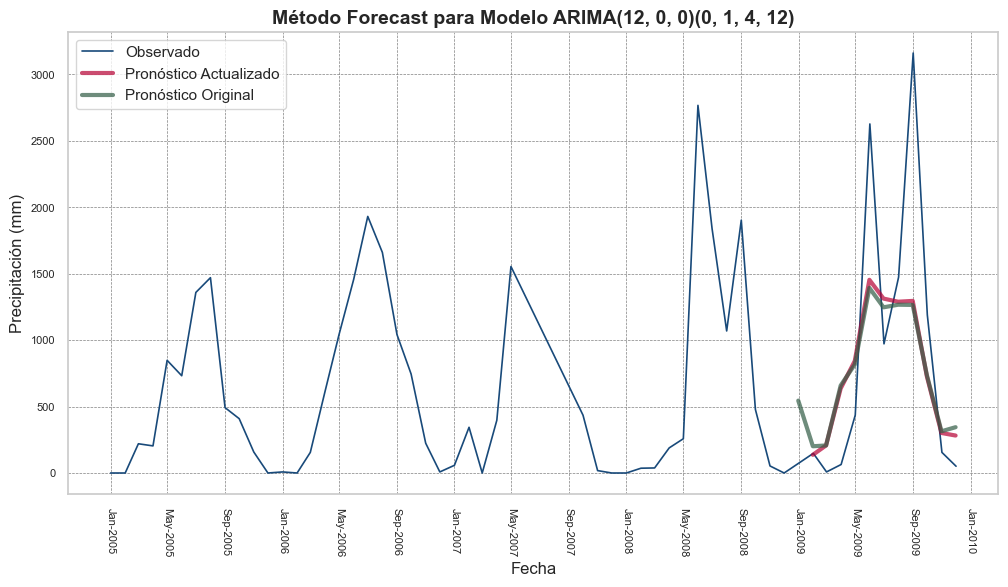

In [101]:
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Pone cada 4 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))   # Formato de fecha

# Filtrar la serie original para mostrar solo desde el año 2000
obs = pre_total[pre_total.index >= '2005-01-01']

# Plotear las series
plt.plot(obs, label='Observado')
plt.plot(forecast_index2, forecast_updated , label='Pronóstico Actualizado', color=sns.color_palette()[1], linewidth=3, alpha=0.7)
plt.plot(forecast_index, forecast_mean , label='Pronóstico Original', color=sns.color_palette()[2], linewidth=3, alpha=0.7)

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")


plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Método Forecast para Modelo ARIMA(12, 0, 0)(0, 1, 4, 12)')
# plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/06-01-Actualizacion-de-pronostico-metodo-forecast.svg', bbox_inches='tight')
plt.show()